<h1>Performing Sentiment Analysis on Twitter Tweets Using Vader</h1>
<h4>by Wong Yew Lee v1.3 8:30pm 07/09/2020</h4>

*This sentiment analysis will be carried out using VADER library on a datasets crawled from Twitter Developer API.*

*VADER is a Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text created by two researchers from Georgia Institute of Technology,USA. The paper for this model was published in Proceedings of the Eighth International AAAI Conference on Weblogs and Social Media*


---
### Content Outline
- &nbsp;&nbsp;&nbsp;1. Import Libraries and Datasets
        - 1.1 Import CSV
        - 1.2 Drop null rows in CSV
- &nbsp;&nbsp;&nbsp; 2.Text PreProcessing
        - 2.1 Clean text from noises such as @mentions / #hastag / RT / hyperlink using REGEX
        - 2.2 Stopwords removal, words tokenization, text stemming and word detokenization
- &nbsp;&nbsp;&nbsp;3. Perform Sentiment Analysis using VADER
        - 3.1 declare tweet_list to receive processed text from dataframe
        - 3.2 Return polarity scores fromVADER on list using for loop
        - 3.3 Move results back into dataframe from returned dictionary
        -3.4 Compute analysis according to polarity scores
        -3.5 Compute subjectivity
- &nbsp;&nbsp;&nbsp;4. Sentiment Analysis Visualization
        -4.1 Analysis Count Graph
        -4.2 Polarity and Subjectivity Scatter Plot
        -4.3 Percentages of tweets
        -4.4 Piechart visualization
        -4.5 Composition Visualization
        -4.6 Density Plot
        -4.7 Boxplot
- &nbsp;&nbsp;&nbsp;5. Words and Stories Visualization
        -5.1 Top Words Use In All Tweets
        -5.2 Top Words Used In Positive Tweets
        -5.3 Top Words Used In Neutral Tweets
        -5.4 Top Words Used In Negative Tweets
        -5.5 Frequency Plot For Top 10 Hashtag Used
            -5.5.1 Top 10 Positive Hashtags
            -5.5.2 Top 10 Negative Hashtags
        -6.0 Tweets Printing
- &nbsp;&nbsp;&nbsp;7.0 Conclusion

---

<h1>1. Import Libraries and Datasets</h1>

In [1]:
#!pip install textblob
#!python -m textblob.download_corpora 
#pip install vaderSentiment
#nltk.download('vader_lexicon')
#!pip install wordcloud
#pip install ipython-autotime ##to calculate run time

#import library

import textblob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import seaborn as sns
import string
import nltk
import warnings #ingnore deprecationwarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import *

sid = SentimentIntensityAnalyzer()

%matplotlib inline
%load_ext autotime

### 1.1 Import CSV 

In [18]:
df = pd.read_csv("final07sep.csv", encoding='utf-8')

pd.set_option('display.max_colwidth', None) #remove python output 30 char max

df = df.rename(columns={'text': 'Tweet Text'}) #change column name to 'Tweet Text'

df.head()


Tweet Text
0                                                                                                                                                                                                                                          @the_resistor @DonaldJTrumpJr @realDonaldTrump She is a bot
1                                                                                                                                                                 @morgfair Trump has been pocketing some of it, and they have been paying the Trump children’s significant others with campaign cash.
2                                                                                                                                                                                                                             @realDonaldTrump This is what a loser looks like https://t.co/X7IihFNE7v
3  @GOPChairwoman You have this arse about face, Ms Romney, and not for the first time. Trump is maliciously and mendaciously hinting that a vaccine will be available before the election to stoke the deplorables. Fauci is sceptical. For Biden and Harris to call this out is right and necessary.
4                                                                                                                      Police Won't Name Leftist Who Attempted to Kill Trump Supporter on Saturday, Girlfriend Says 'This Was Absolutely a Targeted Attack' https://t.co/YK5E7ITlsE via @gatewaypundit

time: 121 ms


### 1.2 Drop null rows in CSV

In [19]:
df.isnull().sum().sum() # to check null value

#df = df.dropna() #drop null column

0

time: 9 ms


In [20]:
for col in df.columns: #show table header
    print(col)

Tweet Text
time: 17 ms


<h1>2.Text PreProcessing</h1>

### 2.1 Clean text from noises such as @mentions / #hastag / RT / hyperlink using REGEX

In [21]:



#create a function to clean tweets
def cleanTXT(text):
    
    text = re.sub(r'@[A-Za-z0-9]+', '',text) #remove @mentions
    #text = re.sub(r'#', '', text) #remove #hastags
    text = re.sub(r'RT[\s]+', '', text)#remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)# remoeved the hyperlink
    text = re.sub(r'(via+)+', '', text) # remove via
    
    return text

#clean the text
df['Tweet Text'] = df['Tweet Text'].apply(cleanTXT)

#show clean text
df.head()

Tweet Text
0                                                                                                                                                                                                                                                               _resistor   She is a bot
1                                                                                                                                                             Trump has been pocketing some of it, and they have been paying the Trump children’s significant others with campaign cash.
2                                                                                                                                                                                                                                                       This is what a loser looks like 
3   You have this arse about face, Ms Romney, and not for the first time. Trump is maliciously and mendaciously hinting that a vaccine will be available before the election to stoke the deplorables. Fauci is sceptical. For Biden and Harris to call this out is right and necessary.
4                                                                                                                                                Police Won't Name Leftist Who Attempted to Kill Trump Supporter on Saturday, Girlfriend Says 'This Was Absolutely a Targeted Attack'

time: 543 ms


### 2.2 Stopwords removal, words tokenization, text stemming and word detokenization 

In [22]:
# remove stopwords
df['Tweet Text'] = df['Tweet Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3])) 

# tokenized the words

df['token'] = df['Tweet Text'].apply(lambda x: x.split())

tokenized_tweet = df['token']

#stemmer for tokenized tweets

stemmer = PorterStemmer()

#apply stemmer for tokenized tweets
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

#detokenizer
for i in range(0, len(tokenized_tweet)):
    tokenized_tweet[i] = TreebankWordDetokenizer().detokenize(tokenized_tweet[i])

#change df[tweettext] to processed words
df['Token Text'] = tokenized_tweet

df.head()

Tweet Text  \
0                                                                                                                                                                                                      _resistor   
1                                                                                                        Trump been pocketing some they have been paying Trump children’s significant others with campaign cash.   
2                                                                                                                                                                                     This what loser looks like   
3  have this arse about face, Romney, first time. Trump maliciously mendaciously hinting that vaccine will available before election stoke deplorables. Fauci sceptical. Biden Harris call this right necessary.   
4                                                                                           Police Won't Name Leftist Attempted Kill Trump Supporter Saturday, Girlfriend Says 'This Absolutely Targeted Attack'   

                                                                                                                                                                                                                                        token  \
0                                                                                                                                                                                                                                 [_resistor]   
1                                                                                                                     [Trump, been, pocketing, some, they, have, been, paying, Trump, children’s, significant, others, with, campaign, cash.]   
2                                                                                                                                                                                                            [This, what, loser, looks, like]   
3  [have, this, arse, about, face,, Romney,, first, time., Trump, maliciously, mendaciously, hinting, that, vaccine, will, available, before, election, stoke, deplorables., Fauci, sceptical., Biden, Harris, call, this, right, necessary.]   
4                                                                                                        [Police, Won't, Name, Leftist, Attempted, Kill, Trump, Supporter, Saturday,, Girlfriend, Says, 'This, Absolutely, Targeted, Attack']   

                                                                                                                                                                            Token Text  
0                                                                                                                                                                            _resistor  
1                                                                                         trump been pocket some they have been pay trump children’ signific other with campaign cash.  
2                                                                                                                                                             thi what loser look like  
3  have thi ars about face, romney, first time. trump malici mendaci hint that vaccin will avail befor elect stoke deplorables. fauci sceptical. biden harri call thi right necessary.  
4                                                                             polic won't name leftist attempt kill trump support saturday, girlfriend say 'thi absolut target attack'

time: 14.4 s


<h1>3. Perform Sentiment Analysis using VADER</h1>

### 3.1 declare tweet_list to receive processed text from dataframe

In [23]:
#declare list as long as tweet_list
tweet_list = df['Token Text']


#declare sublist as long as tweet_list
sent_list = []
n = len(tweet_list)
for i in range(int(n)):
    k=len(tweet_list)
    sent_list.append(k) # push your entered value


time: 39 ms


### 3.2 Return polarity scores fromVADER on list using for loop 

In [24]:
# perform sentimentanalysis on tweet list

for i in range (0, len(tweet_list)):
    sentiment = sid.polarity_scores(tweet_list[i])
    sent_list[i] = sentiment
    print(tweet_list[i])
    print(sent_list[i])
    print ('\n')

_resistor
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump been pocket some they have been pay trump children’ signific other with campaign cash.
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.1027}


thi what loser look like
{'neg': 0.382, 'neu': 0.337, 'pos': 0.281, 'compound': -0.2263}


have thi ars about face, romney, first time. trump malici mendaci hint that vaccin will avail befor elect stoke deplorables. fauci sceptical. biden harri call thi right necessary.
{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296}


polic won't name leftist attempt kill trump support saturday, girlfriend say 'thi absolut target attack'
{'neg': 0.347, 'neu': 0.533, 'pos': 0.12, 'compound': -0.7269}


thi talk about earlier year knew trump card. demorat emot uncontrol illog creatures. crazy, have excuse. they just plane dumb have excuse.
{'neg': 0.217, 'neu': 0.684, 'pos': 0.099, 'compound': -0.6249}


_kitchen_slc quick googl search would help
{'neg': 0.0, 'neu': 0.649

vote democrat thi biden supporters! imagin thi trump support would msnbc 24/7! rememb when coverington cathol boy wore maga they were accus be hate democrat call maga hat? don’t rememb we’ll remember!!!!!!!!!!
{'neg': 0.094, 'neu': 0.735, 'pos': 0.171, 'compound': 0.471}


except when talk about govern 'business' spend public money course. honest incent there, it' govern employ rife with more discrimin than privat sector.
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.5106}


more trump years.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


talk qanon probabl dark shadow deep state. thi peopl realli believ this. trump dangerous. mani peopl thi cult becaus they target religi peopl decad thru youtube.
{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.4767}


thank make independ thinkers, teach troll &amp; thrive matter what obstacle. true #patriots. salut sir!!! #maga #kag #kag2020 #trumppence2020
{'neg': 0.101, 'neu': 0.605, 'pos': 0.294, 'compound': 0.5826}


thi perf

saudi king tell trump want fair perman solut palestinian
{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.3818}


when ask about trump' threaten tweet, said spent career cover dictatorship middl east, familiar with thi kind discourse." respons point:
{'neg': 0.108, 'neu': 0.75, 'pos': 0.142, 'compound': 0.2023}


your lie #atlant magazin under control laurene, it' obviou you'r use propaganda machin churn lie about about your "common sens laws" safe right now? about chicago? compar that arizona &amp; texas. right.
{'neg': 0.057, 'neu': 0.851, 'pos': 0.092, 'compound': 0.3094}


just like 2016 killari number were trump' democrat most news media outlets. truth will come poll wait see.........
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.6249}


then don't have open mind. stop say that support right wing job eager their master endors have open mind. trump could murder someon those would oann with bongino talk about pelosi' jacket pant don't match
{'neg': 0.16, 'neu': 0.719, '

great swath academia media unelect mafia hell bent shove their agenda down throat anti trump, anti brexit, anti johnson, anti culture, anti much histori they'v becom offici opposit with their foot soldier
{'neg': 0.356, 'neu': 0.553, 'pos': 0.091, 'compound': -0.875}


thi omen immin sink presidency.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


pretti good advice, great analogy. despit mani misgiv vote trump. neither go anywher near where want democrat’ craven attitud extrem left, antifa that marxist front make imposs vote biden.
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.8074}


also show what jess jackson, jennif hudson mani other hard times. from heart statement from alveda king. anyon that call racist liar fraud doe know your story. your famili need tell
{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.91}


trump call vet 'losers' just beginning.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


need re-entitl your book "black out" 'coz must con


vote isn’t trump. didn’t your you’r fill your diaper. berni lost. prefer warren. i’ll vote ronald mcdonald over trump. your feel don’t matter. you’r get your way. more.
{'neg': 0.078, 'neu': 0.884, 'pos': 0.037, 'compound': -0.296}


trump best role model. childish demeanor twitter antic remind alway ourselves, even we'r leader free world.
{'neg': 0.097, 'neu': 0.573, 'pos': 0.33, 'compound': 0.743}


dems/msm effect eviscer 2008-12. they reason trump elected. they them their coalit miscreant losers. amazing.
{'neg': 0.168, 'neu': 0.644, 'pos': 0.188, 'compound': 0.1027}


veri sick puppy. biden walk briskli (unlik recent trump video stumbl around know where where should going). biden visit son grave after go church .... whst religi peopl sunday (not play golf).
{'neg': 0.158, 'neu': 0.777, 'pos': 0.064, 'compound': -0.5423}


wast hello poverty!
{'neg': 0.642, 'neu': 0.358, 'pos': 0.0, 'compound': -0.5562}


feel that mani mani democrat offici have down. faith been shaken mani "stron

wasn't project would have noth ever
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


speak killing:
{'neg': 0.815, 'neu': 0.185, 'pos': 0.0, 'compound': -0.6597}


#picoftheday: "from crest wave choppi water trump support join flotilla lake travis, texas, weekend." #journal
{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.5994}


trump head rescu thousand tortur children from underground tunnel polit
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump campaign/incompet administr kind peopl need other down build themselv don't need that #imvotingforjo should, too. 🇺🇸🌊😷🙏🏾
{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5267}


pleas don’t rememb think that american ignor about covid-19. there mani do right thing while trump there support peopl believ it’ hoax. need presid care about peopl rest world.
{'neg': 0.062, 'neu': 0.765, 'pos': 0.174, 'compound': 0.5859}


look like seattl commi get anxious. they will their eye novemb after trump win again. white liv

_farag countri would agre trade deal with honor trump said leav trade under rule
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939}


meet more more your support #california! some first time voters. your base grow rapidli here #leftcoast! keep great work! #kag2020 #turncaliforniar
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.8488}


they cook 1999 long befor trump candid potu disparag vet
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


just fraud, admit they just reveal man...
{'neg': 0.358, 'neu': 0.472, 'pos': 0.17, 'compound': -0.4588}


quit 85.5m 'kay
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


proud alum trump university? keep drink kool-aid.
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}


‘thi onli beginning’: atlant editor tell trump more come over soldier insult #smartnew
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.5106}


thi fake news
{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}


perhap reas

christian, but, christian, muslim, secular humanist, unitarian, sikh, hindu, whatever. part same great journey. attempt find nobl mean thi life. respect earnest pursuit truth. religi fraudul hypocrisi pure evil.
{'neg': 0.129, 'neu': 0.507, 'pos': 0.364, 'compound': 0.9022}


call hunter biden befor congress.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


you'r gonna thi stupid crap about some fallen soldiers? never seen such manipul disgust person before, should asham yourself.
{'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'compound': -0.9081}


peac protesting. veri peac fire
{'neg': 0.634, 'neu': 0.366, 'pos': 0.0, 'compound': -0.6369}


open end bullshit from useless. sen.tim scott south carolina introduc mani meaning reform earli day georg floyd. agit crowd interest solutions.
{'neg': 0.233, 'neu': 0.601, 'pos': 0.166, 'compound': -0.4404}


donald trump latrob #peacefulprotest #protests2020 #trump2020 #4moreyear
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


geeze, t

what could possess right wing cathol embrac trump fake christian best against biden verifi true cathol who’ been faith famili goe church everi sunday? abort rights. they need look this...
{'neg': 0.08, 'neu': 0.668, 'pos': 0.252, 'compound': 0.7717}


with tech spin narrative, they might actual pull off.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


keilar roll tape trump' attack militari
{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}


need whole trump famili return busi deal record.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


that act trump administration, there' covid vaccine. about you? #covid #trumpli #coronavirusvaccin
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


michael cohen’ book say trump held ‘low opinion black folks’ york times.....thi hard take personally..ok, it’ imposs take person
{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'compound': -0.1027}


sorry, read? what your comment with origin message? paid retweet comments?
{'neg'

{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.636}


thi democrat governor mayor their jobs..
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


record lows? lol..
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.2023}


funniest trump can't compil
{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5574}


donald trump see himself greatest presid ever. it' just game show him. he' ratings. it' realli simpl that folks. realli fool bunch peopl you'r real loser suckers.
{'neg': 0.261, 'neu': 0.625, 'pos': 0.114, 'compound': -0.6597}


saudi king trump: palestinian state condit normal tie with israel
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


everybody' talk about biden year congress look other one that' congress right they ain't s*** either chanc someth just like y'all gave trump chanc biden will same chanc know better
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.6597}


sound like both ladi need chill. pretti sure biden doesn't have time sh

want clarification. problem: unfortunately, there seldom wit case sexual assault. addition, investig author often block case "famous" accused. with trump statements, however, there obvious wit
{'neg': 0.408, 'neu': 0.554, 'pos': 0.038, 'compound': -0.9136}


_jihu 20+20 equal wait that’ mani nippl trump would have more
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


let' make clear "journalist" there onli truth, reality, universe, earth, america, real facts! assur unequivocally, that not, repeat miss mark, trump present unless meth!
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.7121}


3100 word trump campaign have share that load? sure none handl that comprehens load independently. #bidenharri #yourbossisadolt
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5423}


yes. know fact peopl campaign want back down- rhetor alway been that defeat trump objective. sad...
{'neg': 0.15, 'neu': 0.65, 'pos': 0.2, 'compound': 0.0}


german offici rip trump' call vote twice:

american, rather have biden sinc feel like even though he' probabl go much, don't think he' go make thing much worse, unlik trump
{'neg': 0.117, 'neu': 0.789, 'pos': 0.094, 'compound': -0.1531}


onli confirm small portion thi story... with anonym sourc man, liber just don't understand don't fall their over over over...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_resistor jesu would come first. wouldn't allow thi ever christ america.
{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.1695}


_sailor thank atlant well done. rise peopl right behind you. support will continu fight with you. trump their sins.
{'neg': 0.208, 'neu': 0.52, 'pos': 0.271, 'compound': 0.1779}


trump need re/elect that, other reason, will have four more year qualiti trump impressions. exampl forthwith: #trump2020
{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.2263}


choos trump obviously... hang can't vote outsid finger cross trump! trump save america
{'neg': 0.0, 'neu': 0.775, 'pos': 


_leavitt state individu from total of142 arrest riot belong antifa trump supporters?.... your spin thi stori hard must constantli dizzy.
{'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.8074}


sucker loser sucker loser sucker america, sucker losers. seem think.
{'neg': 0.888, 'neu': 0.112, 'pos': 0.0, 'compound': -0.9744}


obama kill laden. obvious prefer trump. trump align with terrorists.
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.8689}


baltimore!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


daili new covid-19 more american think about science. could thi sputnik moment?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


report live from with &amp; said “baltimor worst nation” dure seri tweet sunday morn endors show support republican congression candid
{'neg': 0.165, 'neu': 0.726, 'pos': 0.109, 'compound': -0.34}


yeah that slide scale percentages. mani option trump repeat despit million more vote biden. nightmar scenarios. will suffer.
{'neg

{'neg': 0.209, 'neu': 0.364, 'pos': 0.427, 'compound': 0.34}


alleg affair between presid trump stormi daniel took place utah, michael cohen write book salt lake tribun #smartnew
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump 2020
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


woodi guthri ain't home/old trump missin' cousin
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


septemb editori cartoon galleri
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


don’t like indian movi boater trump conserv vintag american flag 2020 shirt they sing danc middl war. possible. #boatersfortrumpconservativevintageamericanflag2020shirt
{'neg': 0.167, 'neu': 0.726, 'pos': 0.107, 'compound': -0.34}


anyon doe understand that trump will presid will retain senat been pay attention.trump mcconnel have been repeatedli tell that veri thing. becom veri insult insinu could lose nothing!
{'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'compound': -0.7712}


thank reminder! yes, re



_rob veri nice usa💩
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}


_dharma vote trump becaus thi random white say
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


"the best chanc trump, republican say, drive singular messag link biden left." thi turn suggest what biden should anyon oper your twitter account listening, advic below free:
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.8176}


rand paul wasn't hear thi shirt when that coward neighbor cold cock him. come think don't want anyon lawn. just hydroseed spend day water damn thing.
{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.7595}


_level i’ll 1000th time. when trump told ‘ca’ produc 2010 that holli robinson peet clear winner said “they want pick n*gger” chose brett michael instead could bare show
{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.7717}


liar liar pant fire!!!!
{'neg': 0.795, 'neu': 0.205, 'pos': 0.0, 'compound': -0.8302}


yes, just where were polic told hide thi

@_commonsense7 notic they purpos end thi chart early? their other chart date, thi isn’t becaus it’ hard argu against trump with
{'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.1027}


think argument would trump, would have sent nation gaurd stop need governor formal request that. which they don’t.
{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'compound': -0.5719}


lolol there, nobodi love trump
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


just can't agre with stanley view about trump. those wounded, crippl even lost their live fight their countri "suckers" "losers". _stanley
{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.5994}


even consid “their conscience” bigoted, moral relativ important. mayb they’r teachable... that case, awesome. they’r not, they convinc they’d desecr their religion particip that event, they cannot forc
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.7096}


we'v seen both variant case recently.
{'neg': 0.0, 'neu': 1.0, 'pos

will never root american presid fail like some peopl even hate indiffer agenda. would still hope best america. will certainli never partak sandbag divis attack that trump navigate.
{'neg': 0.246, 'neu': 0.525, 'pos': 0.229, 'compound': -0.1779}


blame anyon yourself public’ hesit about rush vaccine. thi been brew month thank trump’ deni scienc contradict scientists. explain editori from scienc magazin
{'neg': 0.173, 'neu': 0.735, 'pos': 0.092, 'compound': -0.296}


million job still lost sinc januari 2017, fraud!
{'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.75}


@_reaalamerican_ there will pushback against russia while trump’ office. it’ disast both your allies. trump busi loan russia, he’ll never against putin. bank will lend money, russia gladli will. your presid “sleeping” with enemy.
{'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'compound': -0.5423}


depend facts. it' gener servic busi expect right trade within legal publicly, then yes. it' specif performance, write messag

{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.1027}


concoct republican under bush &amp; cheney.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


person school schooling! virtual learn accept special need children! special need live matter
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8264}


secretari trump' repeat about veteran choic
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


glad your go with marxist playbook that they use against mlk. some thing never old. #blacklivesmatt
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4588}


@_reaalamerican_ yes... then should donat re-elect campaign. trump need more money legal fee drug dealer donat “build wall” campaign (mexico still hasn’t written that check?!) bannon need boat!
{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compound': 0.3318}


"samsung seal $6.6 billion verizon deal trump target huawei" #network #huawei
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


i’ll 1000th time. when trum

{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.7096}


that' question isn't black america should asking, becaus that' question they can't answer honestli when it' ask blacks. know what was. befor black were allow coexist trump' "white america". #blacklivesmatt
{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.2263}


antifa merchandise. trump will have ban
{'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'compound': -0.5574}


thank
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}


stupid
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5267}


what bunch
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


wait hold that warn stfu let' laker advisori warn thank extra last week #thompson43
{'neg': 0.172, 'neu': 0.675, 'pos': 0.153, 'compound': 0.1779}


love shit!! becaus everybodi shits!!. beyonc shits, obama shits, trump shits.. stori book
{'neg': 0.454, 'neu': 0.372, 'pos': 0.174, 'compound': -0.7762}


dad, joseph babin serv vietnam with company, third battalio

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


indianapoli 10th citi crime homicid hmmm. republican state.
{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}


with legitimatis taliban donald trump' administr doubt nato, turkey' research fossil fuel aegean east mediterranean pretenc fulfil geopolit aspirations.
{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.3612}


that’ sick comment. hope get retweeted.
{'neg': 0.324, 'neu': 0.392, 'pos': 0.284, 'compound': -0.1027}


trump promis defund abort industri _ntd
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_ulyanov _russia ahead. trump will noth
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


exec unleash seri vile outburst twitter &amp; wish trump dead
{'neg': 0.464, 'neu': 0.387, 'pos': 0.149, 'compound': -0.7717}


keep do thi givin gift major trump voters!
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.4926}


_mari most them know it’ absolut absurd, they just purpos spread fals i

attack. that’ he’ about. dump trump!
{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.7177}


_stay down
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


julia loui dreyfu mercilessli mock trump
{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.4215}


what' disgust that #congress approv spend prevent govt shutdwn can't agre reason term #stimulu #unemploy spending. keep prove doesn't care about american families. starv #donaldtrump cares. #bidenharris2020
{'neg': 0.194, 'neu': 0.684, 'pos': 0.122, 'compound': -0.5312}


everi riot protest vehement anti-trump. don't peopl wave trump flag while they burn down build assault/murd innoc people.
{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.6808}


_waynetof america also went slavery. forget that part history?
{'neg': 0.489, 'neu': 0.511, 'pos': 0.0, 'compound': -0.7717}


still play card, behind. thi trump support (dem) hope drain both crimin organ from could peopl would they'd rather #resist, which mean they want 



stop thi happening? mayor prepar citi burnt ground defeat trump. polic allow take action. trump deputis polic feder offic there push back. arrest under feder jurisdict antifa loop
{'neg': 0.227, 'neu': 0.716, 'pos': 0.057, 'compound': -0.6908}


know what' relevant: releas senat intellig committe report russian interfer 2016 elect collus with trump campaign. support traitor appar denigr militari anybodi els doesn't kiss ass.
{'neg': 0.076, 'neu': 0.745, 'pos': 0.18, 'compound': 0.497}


actual presid trump have hard right about report say servicemen die "loser suckers" thi good move state dept theyr maneuv this. watch will know what saying.
{'neg': 0.334, 'neu': 0.585, 'pos': 0.081, 'compound': -0.8442}


geez, doe thi mean trump’ covid-19 record longer he’ go like that.
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}


&amp; grandfather. #werespectvet
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


probabl order bucket fri chicken
{'neg': 0.0, 'neu': 1.0, 'pos':

_okonkwo _to_jack yeah liber support trump 2016 most thi black support trump were liber mind you,peopl change. even gave fact becam conserv think becaus that she’ face then have noth els
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.765}


_resistor let’ think kamala encourag yup! plu bail them out! those your awesom socialist democrats!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_realiti author said onli journalism.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


onli brainwash democrat believ said trump love militari serve. mani peopl came said didn’t happen.
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6369}


typic delusion liberal. these protest 100% democrats. your liber antifa weirdo 100% fund georg soros, democrat operative. learn your fact
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.5859}


with except nation wide mask mandate, that' list everyth trump been do sinc beginning. realli need you, joe? nation under attack from lef

{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}


what make think you’r better presid than other?
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}


likewise. rememb be laugh when said time when trump would white hous johnson number
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.5994}


ex-trump offici share predict trump lose 2020
{'neg': 0.273, 'neu': 0.505, 'pos': 0.222, 'compound': -0.128}


trump' respons atlant articl confirm article. attacked/disparag marin star gen. john kelly, ret."h with didn't good job, temperament, ultim peter out... eaten alive. unabl handl pressure..."
{'neg': 0.083, 'neu': 0.827, 'pos': 0.09, 'compound': 0.05}


where your concern massiv wildfir us??????
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


hmm. last heard shut down campaign that don't agre with left agendas. littl suspici that money go somewher other than her. knows?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


matti that “donald trump pre li

how? aren't they bound their honor protect president? realli hope though after disgrac stmta militari that will that, peopl with racist demand help!
{'neg': 0.159, 'neu': 0.492, 'pos': 0.349, 'compound': 0.7616}


either! deep state someth him.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump’ cult follow help cheat stealing. surprise.
{'neg': 0.462, 'neu': 0.207, 'pos': 0.331, 'compound': -0.4404}


trump administr issu fifth space polici directive, aim enhanc cybersecurity, with offici say threat "occur with concern regularity" (loren grush/th verge)
{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.5267}


trump want pull fund from school that 1619 project curriculum #wallst
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}


thank thi import step.
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}


even three year numb much nonsense, trump retweet some yahoo' "sorri liberals! anti-whit perman cancelled!" messag still mind-boggl
{'neg': 0.262



just anoth cheap shot trump. never mind trump hotel near strip. that loves.
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719}


noth trump hate troll
{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}


peopl call trump bori johnson teflon men, which preposterous: true teflon modi. thi realli isn’t surpris after see surviv demonet unscathed, with even peopl devast still absolv when interviewed. god-tier
{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.4215}


stop vigilante. reports: facebook disabl account journalist fort fisher live stream louisvil clashes. pleas demand com serv product equal report concern law-enforcement. they government!
{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'compound': -0.4574}


look here presid trump, don't think favor recogn israel' 3,000 year capital. actually, someth much greater: expos those coward bear fals wit with fear god, they don't like you. like you.
{'neg': 0.307, 'neu': 0.581, 'pos': 0.111, 'compound': -0.7951}


th

busi trash trump real beauti trump, that’ what happen when your meathead! just becaus biden say trump racist don’t make biden administr will just like obama lie &amp; more lies!!! dem have been taken over radic left!
{'neg': 0.185, 'neu': 0.76, 'pos': 0.056, 'compound': -0.7757}


particip someth they feel they sin doing. however, you’ll alway find peopl will particip perform marriage, regardless between.
{'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.5574}


clinton foundat investig found complet transparent. trump chariti shut down trump famili legal preclud from particip charities. trump stole from kid with cancer
{'neg': 0.151, 'neu': 0.687, 'pos': 0.162, 'compound': -0.1779}


onli there actual ciuo against trump. wouldn't mess we'r now!
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.3404}


_revutski look blinds... one believ lie from corrupt trump
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


call yourself proud american.???.. you'll vote treason anima

{'neg': 0.064, 'neu': 0.703, 'pos': 0.233, 'compound': 0.7236}


problem. these rough times, it’ easi confused. assured, anti-trump gets. hope enjoy squar one. still have doubt about michael’ innocence, they will gone after watch
{'neg': 0.204, 'neu': 0.49, 'pos': 0.305, 'compound': 0.5719}


_rinaldi class trash. trump’ have stain slimy, greasy, nasti stain.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


should deni true noth wrong with wife work politician donat money, pleas state your point just shut fuck
{'neg': 0.27, 'neu': 0.615, 'pos': 0.115, 'compound': -0.5859}


media want question mike cohen, credibility... remember, onli time cohen lied, behalf trump, which expect from loyal crime partner! lie hide trump yet, trump serial liar...&amp; media hold everi world utter!nev question him!
{'neg': 0.211, 'neu': 0.682, 'pos': 0.107, 'compound': -0.6458}


have question trump supporters. doe trump angri with report report what actual says?
{'neg': 0.0, 'neu': 0.805, 'pos': 0.

mayb she’ absent comment plan becaus unless it’ privat school she’ make money could care less! anoth trump profiteer. money talk kid lives? concern.
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.616}


trump doe want feder fund california school they teach 1619 project
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}


shittalk make return!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


think there’ much rhetor about him.. he’ enemi these evil peopl away with these crime decades. they’r do everyth destroy becaus they’r be exposed. mani famou peopl that pretend they’r innocent. they’r not.
{'neg': 0.324, 'neu': 0.621, 'pos': 0.055, 'compound': -0.8934}


trump doe care about you.
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}


what said guardian: 'they capitul trump': michael steel fight republican party' soul.
{'neg': 0.17, 'neu': 0.654, 'pos': 0.176, 'compound': 0.0258}


after furor over golf remarks, trump tweet arnold palmer joke about p


trump say depart educ will investig 1619 project school cours they would deflect militari comment
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


seem vote trump death covid jail feder vote fraud
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.8271}


still horrif under trump?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


clean your wapon dude
{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}


julian assang hit back trump’ director mike pompeo
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


block yesterday. block peopl didn't like trump. have narrow mindedness.
{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.7851}


those 4000 boat diego trump flotilla boat parad today must have been russian too. #landslide2020 prepared!
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.2942}


sarah, time work your rehabilitation. frankly, were there presenc trump) times. there video trump call john mccain ‘loser’. keep lie that bastard.
{'ne

want fit? dejoy commun walk sunday. 09/13/2020. location: dejoy castl sidewalk miles. dejoy’ usp corrupt enabl trump further muddi vote process. bring your best walk shoe signs. mile
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.7906}


democrat socialist wacki left wing milit shake your boot becaus know presid trump will elect landslid will cheat anyth defeat presid trump. aint happen
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.7717}


_muggeridg _howerton say have evid that “blm person” kill scenario just present just plausibl “blm person” murder dorn. “blm person” murder your logic donald trump would respons rittenhous murder
{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.9674}


trump meandering.....
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


hilari proof that black peopl use love donald trump befor ca...
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}


gold star father: trump' life testament selfish
{'neg': 0.341, 'neu': 0.6

{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}


_resistor what mean, like hillari clinton receiv million from russia, bill clinton receiv 500,000 just speech. sander also spend alot time russia. last seen dem have more tie russia then trump. alreadi been proven dem still same dem
{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'compound': 0.3612}


cleveland (reuters) republican presidenti nomine donald trump thursday said against iraq along despit tell radio interview howard stern 2002 that favor
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.4019}


environment doesn’t help black commun all. healthcare-wise, obama screw guys. trump wast time get that shit that could actual help you.
{'neg': 0.182, 'neu': 0.62, 'pos': 0.197, 'compound': 0.1027}


ever feel like noth working? becaus it’ not. trump lose elect landslid defeat
{'neg': 0.169, 'neu': 0.563, 'pos': 0.268, 'compound': 0.1921}


anonym sourc with first hand knowledg report that biden said "don't worry, those idi

{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5574}


trump’ mouthpiec want forget hate disparag thi trump say about #militaryfamili vote novemb 2020 trump versu america. where stand?
{'neg': 0.245, 'neu': 0.699, 'pos': 0.057, 'compound': -0.6486}


they plan pandemic?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


your presid disgrac countri deal with virus.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


sexi ivanka trump lather britney spear below water world
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


stand someth fall anything.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


will long trump doesn’t screw tell peopl vote twice some other illeg act.
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.1027}


trump slogan liberti threesom ...... onli white
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


peopl usa, tri these "domest terrorists" &amp; their leaders, "all" communists,&amp;democrat socialists, stop total decim cou

oregon discrimin against republicans, bar from ad voter statement they were onli one have thi happen, other group were added. excus miss deadline. facebook remov patriot prayer group which support right trump
{'neg': 0.047, 'neu': 0.875, 'pos': 0.079, 'compound': 0.2732}


_4_trump iota...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump been accus same crime. believ accus have said they will file charg onc leav office.
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.5423}


biden soft islamists?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


flat earth trump kool-aid drinkers.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#trumpisnotwel and, more specific, stuck mind soul, becaus #trumpli trump
{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.3134}


_maxwell_ share cell with donald trump gulag.
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.296}


shame you.. there excus four gener #trump’ evad declin serve... your veri select ‘f

{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.8126}


morrison do trump risk victorian' live &amp; there' anoth wave will blame? certainli himself he'll take labor premier andrew he' baiter thi pm......😖
{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.5423}


trump tri lose syria bulwark
{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}


wait, sarah say never said never mind.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


year even know that those lie trick
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.0516}


trump boat parad sail into erie, ashor protest
{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.25}


bless donald trump
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}


there onli problem with that fauci report: quot trump. same time go crazi say 3.4% think world will believe, trump who? from then just political, team apocalyps mission.
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.4019}


wow....10

how' guantanomo work world most except empire?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


while trump golfing, campaign attack biden visit cemeteri
{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}


witch-hunt
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump take home from ambassador' resid pari will need count silverwar befor &amp; spawn leav januari
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


unfortunately, your opinion just like drop water ocean. will rather believ until trump proof it' lie.
{'neg': 0.225, 'neu': 0.65, 'pos': 0.125, 'compound': -0.25}


that' awesome!😂👍
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


those conserv remain loyal trump, turn they never actual believ valu they ever espoused. stand reason there' reason think they believ democraci either.
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4767}


crazi #liesafterli
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_west_ democrat have ne

_guid _storm _520 _rip analysi reveal that conjug bind cd13 membran cell with distanc between quantum dot sever hundr nanometers, which tent indic dispers cd13 protein cell surface.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


****************japan love trump******************* ralli japan show support presid donald trump more year .japanes protest believ that onli presid trump stop chines aggression.(part2)
{'neg': 0.152, 'neu': 0.613, 'pos': 0.235, 'compound': 0.5325}


don’t spin thi trump,wak true fascists! democrat parti some republican too! watch trump big, then wow! look mail vote biden! it’ alreadi works!
{'neg': 0.061, 'neu': 0.676, 'pos': 0.263, 'compound': 0.7887}


what meaningless. have zero credibility. onli knew invigor honest truthful. sad.
{'neg': 0.311, 'neu': 0.363, 'pos': 0.326, 'compound': 0.0772}


last week boat sank whilst campaign trump...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


there' religion that condon thi behavior toward anoth hu

trump problem promot same party.
{'neg': 0.321, 'neu': 0.357, 'pos': 0.321, 'compound': 0.0}


thankfully, trump' monument racism complet taken down less than weeks. most gratifying, mexico agre help.
{'neg': 0.169, 'neu': 0.455, 'pos': 0.376, 'compound': 0.6115}


approxim 1200 lake gaston awesome!!! .... most heartfelt, patriot thing i'v ever been part of!! trump 2020
{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.8768}


cash check
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


wonder mani yank will stupid enough vote thi wank thi time around.
{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5267}


lol. realli talk about trump crime family. when them tax releas you'll see. well alreadi know.
{'neg': 0.164, 'neu': 0.607, 'pos': 0.229, 'compound': 0.1027}


assange' arrest&amp;detain illegal.&amp;hi process right constantli violated.ani judgemnt against is&amp;wil null&amp;void.trump will pardon him.if assang guilty,th prosecution,th govern wouldn't need2mak s

interest that skip over whole trump lie part.
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}


realli go miss your inappropri capitalization.
{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.1531}


trump has.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


mean corona. trump' incompetence? want close boarder earlier call xenophob pelosi left. each state elector that close small busi huge corpor stay open "essential"
{'neg': 0.118, 'neu': 0.753, 'pos': 0.129, 'compound': -0.1779}


bless your magat heart, be allow anything. lose friend after call them name could possibl know want friend with call name &amp; bow immor trump?
{'neg': 0.079, 'neu': 0.557, 'pos': 0.364, 'compound': 0.8271}


carol would vote trump #jeremyvin
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


veri successfully. adderal addict ruin sens smell. use word "sense" connect with trump probabl oxymoron adderallmoron.
{'neg': 0.247, 'neu': 0.605, 'pos': 0.149, 'compound': -0.2732}


jus

he' onli say loser here sens elect outcome, which john mccain lose!
{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.75}


earli tweet don. stop vomit your hate
{'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'compound': -0.7096}


cincinnati firm link pro-trump mailer swing state
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


that oprah?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


brother, chri waymire, proud member one, first infantry. combat veteran, bronz star recipi most proud littl brother world. “sucker” “loser”, onli real american hero. #bidenharris2020
{'neg': 0.072, 'neu': 0.633, 'pos': 0.295, 'compound': 0.8126}


thi rate trump will blame defeat “unexplained” mass supporters...
{'neg': 0.435, 'neu': 0.565, 'pos': 0.0, 'compound': -0.6597}


_resistor fake news again! coronaviru start wuhan, china. can't blame trump that!
{'neg': 0.234, 'neu': 0.636, 'pos': 0.13, 'compound': -0.3915}


need never seen again liar rino withheld evid that could have save alot

go with year trump barg into dress room while women were changing.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


yeah, none those point trump making. point that they some reason other than money, then they'r fuck idiots. dont make someth other than what don't word mouth.
{'neg': 0.114, 'neu': 0.814, 'pos': 0.072, 'compound': -0.3182}


🤣becaus giuliani lying. biden been public servant over years. one....no ever accus be dishonest before. whatev these slime ball trump sycoph about biden projection. they describ trump regime.
{'neg': 0.215, 'neu': 0.785, 'pos': 0.0, 'compound': -0.7964}


await trump statement condemn these actions, 1-2-3
{'neg': 0.289, 'neu': 0.556, 'pos': 0.156, 'compound': -0.296}


onli fake!! know number &amp; facts,but still lie!! fact that proven &amp; still lie!!
{'neg': 0.243, 'neu': 0.683, 'pos': 0.074, 'compound': -0.6083}


chamber commerc call more stimulu busi worker
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾👏

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


whole trump tower moscow furnish when he' offic
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


peopl smart fall their lies. what have watch voter fraud left, they plan someth big!
{'neg': 0.319, 'neu': 0.556, 'pos': 0.125, 'compound': -0.636}


what trump done veterans? concerned, action speak louder than anonym words...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


want crimin have justic wanna punch/kil trump support caus think they'r racist fascists. sum keep laugh dri balls. your realli win peopl over with your kindness.
{'neg': 0.148, 'neu': 0.485, 'pos': 0.367, 'compound': 0.8225}


anonym doesn't mean unknown. mean journalist releas their ident protect them. what think "unknown sources", which thi absolut isn't
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3818}


just woke some peopl give bigger platform reach them. use justlik use her.th differ bigger ofminor will that point. would like thank f

190/196 countri world disapprov unit states. countri have neg view trump. tell again countri around world love trump. onli know russia, turkey, saudi arabia, poland, israel &amp; philippines. they have dictat leader
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.6369}


bibi read books. trump that doesn't read books, brief anyth about himself.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


no.. biden’ polici better prison reform. black employ been go down. obama economi trump he’ liter just ride wave. henc rise black democrat
{'neg': 0.121, 'neu': 0.772, 'pos': 0.107, 'compound': -0.1027}


take thi down. stop be ly puppet
{'neg': 0.204, 'neu': 0.463, 'pos': 0.333, 'compound': 0.34}


whiz they realli don’t like trump peopl
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}


it' broke becaus siphon campaign donat directli into privat businesses! attent done numer times! some fuck homework into your presid children!! think "campaigned" throughout term?🤦‍♀️
{'

sound more like your campaign privat bonespurs.
{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}


ground. like you, just take your word have present evidence. far, have onli seen opinion from you.
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}


dick
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}


dawg can’t trust anyon
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}


make sense. except doe what trump doe best. make decision, see reaction, doe about turn.
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6369}


aboard trump train!
{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compound': 0.1007}


there need about spread misinform news source. some kind hefti fine something.
{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.6369}


hello lost popular vote almost million vote-a-rooni
{'neg': 0.228, 'neu': 0.495, 'pos': 0.277, 'compound': 0.128}


doe that translat mean trump vote huge #bluewave2020 goe jail
{'neg': 0.0, 'neu': 0.7

_kri @_godlessemperor what hatr have heard from republicans?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


lol. spoken lie lie lies.
{'neg': 0.326, 'neu': 0.349, 'pos': 0.326, 'compound': 0.0}


democrat republican oppon attack trump have qualifi fallen u.s. soldier “losers”. thi come shortli after trump propos follow vote time order check registr their previou mail vote. twice vote feder crime.
{'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'compound': -0.8442}


replac donald trump with michael scott thi could 100% scene from office😂😂
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


mail ballot take longer count? when mail ballot earlier year, tere deadlin them town clerk befor elect drop mail advanc option drop poll elect day. count them 3rd?
{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.5514}


hope majesti queen elizabeth doe pass away while trump office. pass will occas where decorum respect call world will watching. trump would sure behav like giant, inappro

concept that trump avoid war biggest all. china want trump reelect becaus weaken allianc which will give them freehand taiwan. russia want same same reason europe. north korea just love trump becaus he' idiot.
{'neg': 0.262, 'neu': 0.559, 'pos': 0.178, 'compound': -0.7096}


shame sell
{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}


more proof fraud. cours noth will done..how works..al abov law..our govern onli put citezen jail... disgusting...
{'neg': 0.214, 'neu': 0.786, 'pos': 0.0, 'compound': -0.6222}


biden american want pick over thi younger biden.
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772}


about thi trump reelect world will four years?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


realli love book. made know understand better. love pretti quickli white house. obama well trump' patholog jealousi rather inhuman.
{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'compound': 0.9246}


‘bliss that dawn aliv young veri heaven.‘ wordsworth start fr


trump, next week
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


els want final question what happen aft trump’ puddl visit?
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0772}


made legaci yourself be among most corrupt, dishonest peopl government. noth carri weight impact. are, always, lying.
{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compound': -0.8115}


right madam kamala harri america need honest like biden bring them togeth sinc donald trump white hous divid america long live biden
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.7003}


1971: tito light cigar oval offic next presid nixon. 2020: serbian presid sit chair front trump.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


amen!!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


peopl still talk about russia 'meddling' election, never anyon mention pope!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


realli followers, doesn't matter mani follow have content tweet your content
{

_guid _storm _520 _rip here, label singl protein with quantum dot situ that abl perform imag super-resolut microscopi (structur illumin microscope, sim) perform reconstruct comput simulation,
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


remember, trump "graduated" wharton, pmsl
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


hahahahahahaha goodness!!! lack coher thought, lack sense....leav sad. what nation become? just brain dead bodi wait next instruct from msm? start with mtv. told peopl year that ruin kids.. hmmm?
{'neg': 0.389, 'neu': 0.543, 'pos': 0.068, 'compound': -0.9351}


respect presid do best nation support trump
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.875}


false. #trump want push vaccin befor they proven safe effect order re-elected.
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.4939}


_stocker except mccarthi right. leak from soviet prove thi result
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}


would trust trai

alreadi told death cert work. recommend they want, they don't determin what certifi put death cert. that' doctor.
{'neg': 0.305, 'neu': 0.547, 'pos': 0.148, 'compound': -0.7184}


there’ love yourself, then there’ narcissism. donald trump exampl love yourself much
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.8555}


_knight lead into kind what? support trump? support trump’ singular effort presidenti histori take down child trafficking? critiqu make sense. your critiqu someth that doesn’t actual harm. mere seek inform.
{'neg': 0.09, 'neu': 0.669, 'pos': 0.24, 'compound': 0.7041}


disagree. trump lie about everything. it' like rush unsaf vaccin polit reason never happen before.
{'neg': 0.144, 'neu': 0.718, 'pos': 0.138, 'compound': -0.0258}


holi #evangel #evangelicalsfortrump help
{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}


hold 10-point lead over trump poll “watch econom indicators”
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


fake news aliv w

noth valid barr. he’ trump’ fixer sinc last went jail.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


word descript your presidency.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


your littl follow talk about looks. know, exact same thing that make other feel like garbag doing.
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}


run prez 2018 start 1:40 second anounc say john mccain hero... trump say "he' hero becaus captured, like peopl weren't captur
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.7269}


stop listen shit-for-brain impotu look real world.
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}


important! some friend aver trump practic caper with lizard people, been sent memori hole
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.6476}


landslid trump win!!!
{'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound': 0.6884}


break news: drumpf continu deni report that disparag fallen militari personnel.
{'neg': 0.2, 'neu': 0.8

stop trump, need vote person, even have crawl through broken glass
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.6486}


all, 100% #fakenew either gain trust sympathy, spread lies. they enemi countri must held account under letter law. #sedit #treason #conspiraci #fakenew
{'neg': 0.093, 'neu': 0.6, 'pos': 0.307, 'compound': 0.7506}


maybe, just person from covid trump stop golf ain’t caddy.
{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}


_progress yeah that shit exactli what trump he’ gonna probabl murder support befor they even chanc vote him. sad. hilarious. 😂😂😂😂
{'neg': 0.335, 'neu': 0.441, 'pos': 0.224, 'compound': -0.7003}


will becaus will presid then. will what fucked. will continu great thing start with obama, which have taken credit for.
{'neg': 0.157, 'neu': 0.605, 'pos': 0.238, 'compound': 0.3182}


thi could tweet
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


2020 unit state america president. thi elect
{'neg': 0.0, 'neu': 1.0, 'pos': 0.

_visibl donald trump traffick young girl model agency. he’ been accus rais year old. he’ walk teen girl nake their dress room beauti pageant. qanon conspiraci defend pedophile. trump rapist. you’r crazy.
{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.8074}


trump negoti #trump2020
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


eric your just miss gun shoot black back make perfect trump gather
{'neg': 0.354, 'neu': 0.442, 'pos': 0.204, 'compound': -0.1779}


actual believ garbag come your hole. need brain
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


understand everyth
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


say admit liar...
{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.2023}


protest have been peaceful! it’ your white nationalist racist start these riot
{'neg': 0.469, 'neu': 0.379, 'pos': 0.152, 'compound': -0.7712}


thi great news. thing will stacahng much faster now. 👀👀👀the conced that trump right along busi
{'neg': 0.0, 'neu':

donald. first find your helicopter, then vomit your inner voic world palm their forehead
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


excel strategi bring liar about lies, #trumphatesvet #trumpisanationaldisgrac
{'neg': 0.433, 'neu': 0.355, 'pos': 0.213, 'compound': -0.4767}


instead do job, trump cant help poke nose everywhere. most american must sick him.
{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'compound': -0.7024}


pleas help brave girl that' afraid face they creat pressur send state agenc hous
{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.7269}


atlant legit. read
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_lorid hmmm. sound aw like real quid quo.... where hear month that before.... love left tri take credit everi great thing trump done, hang their dirti laundri master projection! fake media parrot
{'neg': 0.071, 'neu': 0.617, 'pos': 0.313, 'compound': 0.8908}


realli think trump didn’t trump coward. deni everything. someth privat when will hav

_politics20 doesn’t matter what is,russians,usps,covid, military,th inaugur funds,taxes,nepotism, gold star families,children cages,subpoena shows,so much more i’ll stop there,trump doe what trump want when want consequ what ever 🖕trump
{'neg': 0.082, 'neu': 0.795, 'pos': 0.123, 'compound': -0.197}


trump doesn't play nice with others. co-play best.
{'neg': 0.322, 'neu': 0.369, 'pos': 0.31, 'compound': 0.21}


'we'r screwed': kevin mccarthi give trump some tough elect talk
{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.128}


ratiod
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


osama laden' niece: onli trump save america
{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}


said befor i'll again. trump support need seek mental help now. noth bunch kisser
{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.7964}


everyon know best mass debat
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


think should care confus critic trump attack e.g. 1

joy--a perfect member trump' team--rich, corrupt, devoid moral compass.
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}


_nyc noth with race. everyth with fact that didn’t know from hole ground. start divid thi country. start isis. after benghazi &amp;th iran deal, were done. dare call racist when elect twice!
{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.6476}


word, must get readi grade
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump' support anti-vax conspiraci nuts, everyon els with function brain will want noth with vaccin be pump snake salesman muse about benefit inject bleach fight covid.
{'neg': 0.149, 'neu': 0.638, 'pos': 0.213, 'compound': 0.2732}


babies, children, pregnant mother die covid trump do herd immun with swing hand &amp; protect harm elements. #registertovot
{'neg': 0.272, 'neu': 0.515, 'pos': 0.213, 'compound': -0.3818}


thank
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}


inde were there remember. spun lie ame

what bull shit. trump speak about late senat john mccain will never fade from mind. shock disrespect senat mccain' militari servic trump, dodg draft. inde like live troops, they have "respect"
{'neg': 0.234, 'neu': 0.701, 'pos': 0.065, 'compound': -0.7579}


have nerve, liar!!
{'neg': 0.66, 'neu': 0.34, 'pos': 0.0, 'compound': -0.5972}


say defund postal servic &amp; elect he’ terrifi cannot merit.
{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.3252}


trump say school teach times’ 1619 project ‘will funded’
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


that especi lame attempt deflect even trump standards. come eka, sure better than that.
{'neg': 0.147, 'neu': 0.579, 'pos': 0.274, 'compound': 0.34}


loui dejoy trump donor interf election, littl
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


didn’t vote twice, sinc can’t listen properly, hope your democrat friend that know loser will take note that it’ feloni vote twice. trump said check that your ballot c

right. it’ becaus with everi breath. that you’r be censored. forev victim.
{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.4019}


trump 2020
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_jio here jiofib order number no0000eyiv5i been time instal re-schedul reason. know reason? don't give fals commitments.
{'neg': 0.078, 'neu': 0.849, 'pos': 0.074, 'compound': -0.0181}


late.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


noam chomski say trump wors than hitler #trumpterror
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


onli fool fool like yourself.
{'neg': 0.563, 'neu': 0.194, 'pos': 0.243, 'compound': -0.5106}


want woman look trump look putin. that mean, don't want woman (who "my" woman, own) fawn servil like trump toward putin, like look admir love. "my" woman best friend equal partner.
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9531}


what shock report about trump militari reveal about
{'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'comp

trump, might care about 250,000 peopl were diagnos with covid super spreader event sturgi hear that cost billion dollars? plan covid mean econom disaster.
{'neg': 0.127, 'neu': 0.652, 'pos': 0.22, 'compound': 0.4588}


realli nuts!
{'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3802}


“philanthropist lauren powel job donat more than $1.2 million nearli democrat politician sinc 2019 reportedli close contact with journalist publish piec presid donald trump that claimed, base onli anonym sources”wir
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_resistor dement much?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


will costa rica too! they gradual open americans, state state.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


it’ becaus trump use campaign donat legal fee debt owe russia, saudi arabia, china. owe chines bank hundr million dollars.
{'neg': 0.114, 'neu': 0.818, 'pos': 0.068, 'compound': -0.25}


trump take home from ambassador' resid paris. t

take about second think about come conclus bollocks. trump go cheat. cheat last time.
{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.7184}


becaus they want beat trump thi year! they never took loss democraci requir consent
{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.5352}


what bunch crap. even wast your breath?
{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.3818}


trump potus. flotu former porn model, speak broken english skill visa. promin religi support caught cuckolding. evid cultur prob nitch rapper, aforement polit hack that use naacp say racism doesnt exist?
{'neg': 0.19, 'neu': 0.739, 'pos': 0.071, 'compound': -0.6705}


those support terrorist organ dishonest.
{'neg': 0.641, 'neu': 0.153, 'pos': 0.206, 'compound': -0.7717}


188,941, accord john hopkin university, possibl keep
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


maga don't y'all think your donat would better use than trump legal fees?? 😂😂😂😂😂😂😂😂😂not smart folk
{'neg': 0.0, 'n

{'neg': 0.145, 'neu': 0.641, 'pos': 0.214, 'compound': 0.1531}


lazi argument. econom anxieti account don't explain republican vote republicans, million vote obama twice befor vote trump, turnout becaus peopl feel fail abandon both parties. off, queen. lose again.
{'neg': 0.303, 'neu': 0.627, 'pos': 0.07, 'compound': -0.836}


forg tie with us.... hold beg bowl donald trump? biden win elect then britain truli screwed... they will allow bori f.around with northern ireland all...
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.6908}


found cure cancer lib would bitch that didn’t cure common cold
{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8481}


onli would donat least much defeat trump, after (falsely) pledg "spend what takes" trump presidency. bloomberg just sit billion &amp; let trump term, *that* will true legacy.
{'neg': 0.097, 'neu': 0.812, 'pos': 0.091, 'compound': -0.0516}


tiger work everi dont pass trump blunt liber stoner shirt thursday afternoon friday, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


have credibility!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


agre pay teacher angel just laid onli union which paid less benefit
{'neg': 0.099, 'neu': 0.709, 'pos': 0.192, 'compound': 0.3197}


german offici rip trump' call vote twice: 'unscrupulous' 'disturbing' #smartnew
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


there appl both sides. citizen even know werent trump, who typic means! your countri will continu go dogs/demrat weren't step wake countri need believ hype! msm.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


everi them post maybe. over 90%+ peac protests, know y'all don't understand major works. fuck trump, skip. case haven't heard
{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.6597}


1/30 trump boast under control, 1/31 declar public health emergency. week later devin nune encourag american dinner,” while matt gaetz made light covid wear mask floor congress. 3/26 world with

fire peopl follow policy. salli yates. john bolton. jame comey. ask... everi time doe media democrat have damn meltdown because, dare dictat deep state.
{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.6249}


trump chump veteran!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


will backfire. trump win again!
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239}


taliban peac talks: what expect from round? #donaldtrump #afghanistan #europeanunion
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_biker awesom 👊👏🏻👏🏻👏🏻
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


100% accur
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_week been say thi from work 2016 would they 2020? it' even easier sinc trump unleash more attack through manipul intellig post offic from perch potu
{'neg': 0.112, 'neu': 0.795, 'pos': 0.093, 'compound': -0.1513}


blame trump fake bodi count!! putin bounti american military- where death there too? stop watch main stream n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


ya'll know donald trump first u.s. presid sinc jame polk that doesn't have famili white house? everyth about those peopl cold rigid... blechhh
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


huge step down toilet.. behind everi bubba trump hate tweet.. ahead call racist becaus disagre can't stand punk.. don't have problem with busch hater
{'neg': 0.308, 'neu': 0.558, 'pos': 0.134, 'compound': -0.7871}


whatev ration mechan float your boat, were. can, give reason vote biden/harris, know their histori platform, besid bad. make list even? honest. repli thi question yet. convert
{'neg': 0.11, 'neu': 0.786, 'pos': 0.104, 'compound': -0.0516}


_honey1 nice see crazi radic liber one that thi motion tri pretend wasn’t happen call peac protesting, overplay your hand like usual blew your faces!🤣now you’r gonna lose your scare shitless! trump❤️
{'neg': 0.242, 'neu': 0.566, 'pos': 0.192, 'compound': -0.2924}


nope bots. wish they w

about trump/gop station unequivoc said it’ true everyth trump said about militari degrad them it’ true. ignor that then gotta closet racist know not.
{'neg': 0.131, 'neu': 0.686, 'pos': 0.183, 'compound': 0.1531}


__strobel we’r do great, thank you. again, you’r trump train where everi citi disast everi backwat eden. check education, health, hunger statistics, etc.
{'neg': 0.07, 'neu': 0.699, 'pos': 0.231, 'compound': 0.6808}


democrat clearli behind thi #covid viru along with #ccp chines communist party. their plan take down #trump destroy #us. #biden win #china will u.s. #vote trump #maga
{'neg': 0.103, 'neu': 0.706, 'pos': 0.191, 'compound': 0.4588}


question: with trump' warp speed vaccine- least have thi program place? emerg prepared vaccin safeti vaccin safeti
{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.2263}


well inform cons. area
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}


it' #chinaviru #wuhanviru #chinesegenocidebybioweapon #communistchina_i

jack... appear deep state/ structur design build trust &amp; follow with patriots/trump support thi game extens use onlin with publicli trade compani they be ransack those pretend there save cont
{'neg': 0.038, 'neu': 0.71, 'pos': 0.251, 'compound': 0.8316}


stupid action!
{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5707}


trump support get knock bloodi after unhing woman threw drink
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}


trump' dishonest campaign entir on-brand you’r order sure, you’v more peopl indict from your administr you’v been impeached, you’v lie over 18,000 time counting, .......
{'neg': 0.128, 'neu': 0.793, 'pos': 0.079, 'compound': -0.34}


thi trump' game plan: cost.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


fact that donald trump even small chanc re-elect infuri cannot understand 30-40% voter cannot inhuman destruct causes.
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.4168}


take: support donald trump shouldn't

work realli hard $400 million inherit from father
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1027}


trump with evangel said: 'can believ that bulls***?'
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


motiv whenev former friend mentor &amp; their awards. year later they recent said they’d unfriend kept support (adios!)🤷🏾‍♂️✌🏾 #hollywood #hollywoodexpos #fakenew #fakenewsmedia #maga2020 #hollyweird
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.8478}


gaetz also belong crime family, although larg trump family.
{'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'compound': -0.5423}


#bountyg dear tammy, nerv will feel better, have success against these trump-mafia. such great woman fighter, your countri need peopl like you! respect you, stay save!
{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.9729}


lie everi day. have credibl #trumpli
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


don't have equat lauren evil psychopath you? that' fals equivalenc

_gray mayb hope pick some antibodi from stranger’ drink
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}


trump’ america
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


that’ stupid. neither those sticker show support candidates. attract say what focu univers doesn’t recogn like/dislike, onli focus. she’ help trump quantum level.
{'neg': 0.112, 'neu': 0.627, 'pos': 0.261, 'compound': 0.5423}


there still peopl cling belief that trump russian agent, that cancel schedul side-trip honor fallen soldier franc declar that they were "sucker loser be killed." yes, easili influenc moron exist.
{'neg': 0.334, 'neu': 0.53, 'pos': 0.136, 'compound': -0.8225}


trump-biden transit could volatil atlant
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


claim hate communist china, they obvious love iron fist one-parti rule polic state. trump love putin loot russia critic murder perman dictator. there will tiananmen squar america soon.
{'neg': 0.251, 'neu': 0.549, 'pos': 0.2

what doe alli mean here? feel like it' possibl example, note that trump administration' crimin justic reform bill some good element without be some sort pipelin fascism.
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.6597}


love constitut america donald trump
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


inquir about her.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


watch murdoch machin everyth power return trump power.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


elect may, would have tri harder covid-19? believ #verystrongli would have. tragic. #onetermtrump #bidenharris2020landslid
{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.4588}


genuin scare where we'r going. with johnson admir trump, could anywhere.
{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.4939}


trump can't justifi word actions, hope support will realiz thi befor elect vote him.
{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6808}


trump' 'rac

ahhh there will mental health issu that trump cards.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


feel that. woman should spoken about like that.
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}


explain that just becaus there multipl thing death certif doesn't invalid them. they were contribut factors.
{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.5994}


_terrenc trump: “bunch sucker losers”. know orang thug said think #trumphatesourmilitari #trumphatesvet #trumpisanationaldisgrac #trumpisatraitor
{'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'compound': -0.5267}


thi bishop sell lie christ. thi video fill with hate, bigotri dishonesty. trump anti christ. against doe says. person know that. thi bishop confused?
{'neg': 0.283, 'neu': 0.717, 'pos': 0.0, 'compound': -0.8074}


you’r darn right you’r lunatic. just read your previou post “who hell thi guy, he’ lunatic!”?? might wanna schedul anoth visit walter reed. appear go crackers.
{'neg': 0.26, 'neu': 0.

_veri think look some trump' photo where back camera outlin someth squar under jacket. think putin track devic donnie.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump snow time. sad!
{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5255}


noth cricket from republican senat over trump' disparag militari #smartnew
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


didn’t have everyth readi pandem befor trump step way, dont keep economi shut down help peopl back work. have plan polici just hate trump.
{'neg': 0.13, 'neu': 0.775, 'pos': 0.095, 'compound': -0.25}


trump deni 'mini-strokes' sent walter reed
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


kinda feel like thi littl news item buri daili avalanch vomit.
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.3008}


new confirm
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


conserv lost right bitch about celebr have opinion about polit when they elect donald fuck trump!!!
{'neg': 0.446

engag negoti with hostil foreign countri &amp; small slip like biden prone could "war"! think about "that"!! trump want these foreign war &amp; bring son &amp; daughter home! might war becaus can't talk plainly!!
{'neg': 0.21, 'neu': 0.701, 'pos': 0.089, 'compound': -0.8002}


lie trump. have zero credibility.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


love trump' humor too! roundtables, when there "light" topics, ralli hilarious! you'r right, veri differ humor, just funni effective. mani ways, think trump' humor more effect make fake new media crazy.
{'neg': 0.126, 'neu': 0.504, 'pos': 0.37, 'compound': 0.8785}


don't call trump putin' puppet nothing. #putinspuppet
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


north carolina attorney gener indic investig trump’ postmast gener loui dejoy after expos
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


onli person think #presidentbonespur wouldn’t have return from hadn’t been #draftdodgerdon? epic stupid sure 

#hobbylobbi can’t believ y’all boycot hobbi lobbi caus some custom vote trump that’ probabl most childish thing have ever heard 🤦‍♂️ lost brain cell just read whini post “i’m triggered” 😂😂#boycotthobbylobbi
{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.5849}


happi
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


disparag everybody, just like with military. narcissist
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}


from article: "trump administr lift tariff steel aluminum argentina." sold steel aluminum worker trademark. veri trumpian.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


stick butcher nation anthem. same crap that diamond silk did. decid were trump supporter. weren’t even republican till trump just like they weren’t. becaus made easi buck speak support racist
{'neg': 0.164, 'neu': 0.596, 'pos': 0.241, 'compound': 0.2732}


while drump golfing, campaign attack biden visit cemeteri
{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -

trump horribl person, that worship hard understand.
{'neg': 0.163, 'neu': 0.581, 'pos': 0.256, 'compound': 0.2023}


still cri about peacetim service, that' got. must parties.
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}


traitor trump satan suit.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


think when slow reveal name seal that kill obama laden disgrace.h endang these men,their families,our nation security.that sound pretti damn disrespect militari
{'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'compound': -0.8807}


@_reaalamerican_ here, they includ left' talk point first paragraph. divid country. self style "woke" elitist protect their empirear divid country.
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.3818}


there littl point listen what trump promises, what johnson promises. both what they think peopl want hear moment they
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.6705}


vet john dare coward trump.
{'neg': 0.429, 'neu': 0.571, 'pos': 

more than 99,600 peopl have die novel #coronaviru citi checker across #iran' provinces, accord #iranian #pmoi/#mek. ._eea trump
{'neg': 0.176, 'neu': 0.721, 'pos': 0.104, 'compound': -0.3818}


live just fine befor internet, especi social media. that plug pull &amp; social media disappeared, would "gain back real time"💥 think about that when talk about censorship!💥 radio💥 #teardownbigtech
{'neg': 0.057, 'neu': 0.779, 'pos': 0.164, 'compound': 0.5562}


it' 'dirti trick'. trump' freak must have bought site use redirect. want have enemi worri voter with.
{'neg': 0.151, 'neu': 0.781, 'pos': 0.068, 'compound': -0.3818}


well the🇺🇸dream certainli changed,that sear roebuck hous could afford gone, heck sear gone!💰= power, more more power. it' drug &amp; will anything, keep that power. stopped! 🇺🇸trump need stopped!vote! vote blue💙vot the🍌republican
{'neg': 0.054, 'neu': 0.853, 'pos': 0.093, 'compound': 0.3331}


yeah!! where it???
{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'compound': 0.5145}


{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7645}


absolut agre presid trump play golf today privat club trump brand golf properti virginia. video taken signific distance.
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}


elect 2020: presid donald trump get osama laden' famili member' support, here'
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}


knew. vote email lady. happily. couldn’t work day after election, upset. i’v hate trump years. couldn’t even watch apprentic without throw shit
{'neg': 0.204, 'neu': 0.584, 'pos': 0.212, 'compound': 0.0577}


just want play puddl like good littl boy. he' total lost
{'neg': 0.132, 'neu': 0.345, 'pos': 0.523, 'compound': 0.7003}


donald trump happi paddl unfound illog rumor about everyth suddenli valu need proof about russian novichok poisoning? just doe putin have thi guy?
{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'compound': -0.6322}


sail away with trump’ navi
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

_rico 4,000 boat show when patriot fight back they don't violenc they show their love america. #trump2020 #trumpboatparade2020
{'neg': 0.114, 'neu': 0.702, 'pos': 0.184, 'compound': 0.3818}


trump interview humili even host can't save
{'neg': 0.305, 'neu': 0.695, 'pos': 0.0, 'compound': -0.3875}


scott’ head even know what’ go right now, break, don’t know better.
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}


confirm deni thi piece" been confirm other news outlets? #trump attend ceremoni france? other world leaders? attend similar ceremoni arlington day later? go dover reciev bodi fallen?
{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.5362}


with ❤️❤️❤️ eeeeewwww some these eeew peopl make themselv feel better life? yeah? ❤️❤️❤️❤️🇺🇸❤️❤️❤️❤️presid trump
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6662}


said journalist just tweet away from trump saab
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


major american will help biden’ plan. trum

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


your fault there still riot go
{'neg': 0.612, 'neu': 0.388, 'pos': 0.0, 'compound': -0.743}


said love bibl vet your trash these brave men!
{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.8356}


unhing
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


presid that’ import proper peopl posit befor after gone
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


"compromised": peter strzok investig trump campaign
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


kinda like mani guy that lie about? zero credibl
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.2975}


trump: "ted cruz' kill jfk" biden" didn't" trump biden present "dizzyingli differ version reality" they not.... reality, other fuckinh fantasy. stop with thi shite
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.7845}


rich need sympathi
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.5574}


[picture] love with definit trump! ye

oooh snowflake!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


haven't seen biden sign far. trump way.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


rather have less money than have president.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


know soro behind these riots. soro out, grim reaper knock door. want with bang
{'neg': 0.363, 'neu': 0.57, 'pos': 0.067, 'compound': -0.7717}


your turn over age ago. stop take team
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}


watch them. they kiss trump love butt.
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.7906}


racism one-0-one, eras black history...yup!
{'neg': 0.523, 'neu': 0.477, 'pos': 0.0, 'compound': -0.6588}


just excus they wish they could everyday. uneduc uncivilized. they dont know different. would beat shot they approach like that. mouth would running!!
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.6988}


better pray that trump wins. not, want retweet thi day after e

want fit? dejoy commun walk sunday. 09/13/2020. location: dejoy castl sidewalk miles. dejoy’ usp corrupt enabl trump further muddi vote process. bring your best walk shoe signs. mile
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.7906}


same trump warn just signal nut twist wish danger
{'neg': 0.356, 'neu': 0.444, 'pos': 0.2, 'compound': -0.2732}


horrible!!
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6229}


need when pass
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


just unfollow moot follow trump💅
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump furthest thing from christian get. verbal person attack alon enough prove that. you'r life parallel way, you'll spend etern hell right next him. good luck with that!
{'neg': 0.211, 'neu': 0.633, 'pos': 0.156, 'compound': -0.4753}


alway amaz 'right' side misl dem #trump what go make better. goe there goe fairness, love countri (which dem hate &amp; want throw furnace) violence, burn &amp; destructio

fire trump clown
{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.34}


hello bot.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


woodland hill reach degre l.a. county’ highest temperatur record kabc-tv hashtag toxic donald trump sleepi 2020 #topenew
{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0258}


news, your station choice, report same break story, confirm facts, fake news?
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767}


_penc co-op busi where worker have share answer unions.. promot fair ownership idea polici business. when worker have skin game chang everything.promot thi idea,
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.5423}


more honest kayleigh.
{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.5563}


haven’t explain anyth you’r just spout nonsens bullshit that heard someth like that. you’v just said other trump peopl frame world your mind it’ true. feel you.
{'neg': 0.115, 'neu': 0.725, 'pos': 0.16, 'compound': 0.128}


made realiz more than ever that need take ownership democraci leav crazies. know plenti smart, thought peopl could make posit contribut polit discourse, they’r busy. trump show have make time.
{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.4019}


know it' fake. thi real.
{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}


_maxwell_ trump will have goon poll intimidate/coerc voter into vote him, scare peopl from polls. elector colleg "suppos becom awar thing like that, notifi authorities, &amp; adjust elector vote appropriate. "should safeguard.
{'neg': 0.086, 'neu': 0.777, 'pos': 0.137, 'compound': 0.2263}


trump have tendenc dictat (like ceos), system won't rogue. that' risk elect somebodi like #trump bold enough fight hardcor evil dictat like risk monster bite back.
{'neg': 0.188, 'neu': 0.51, 'pos': 0.302, 'compound': 0.3022}


would interest have new complet turn trump.
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}


trump campaign republican ha

trump’ administr continu shatter record most anti-work presid ever! #defeattrump #defenddemocraci #laborday
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_usci there littl doubt that most kid will suffer damag tell trump administr thi pointless- they knew -they precis caus harm “disincentive” immigrate). thi they should charg with crime against humanity.
{'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.9226}


‘thi never happened’: sourc close trump ralli defens over atlant stori
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


know, don’t believ them.🙏🇺🇸
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


could never market firm help convert peopl your side like these mental midget do trump. everi time they like belliger psychopath terror innoc folk they creat more trump supporters... dumb
{'neg': 0.235, 'neu': 0.637, 'pos': 0.127, 'compound': -0.6395}


tech? he' that cowboy from that show, with know, forget name, while back. him?
{'neg': 0.148, 'neu': 0.8

just like bush cuts. that' need hous senat make them permanent.
{'neg': 0.161, 'neu': 0.657, 'pos': 0.182, 'compound': 0.0772}


reagan crimin elliot abraham commit genocid nicaragua guatemala salvador. georg bush pardon back donald trump' cabinet venezuela. oliv north bill clinton runway arkansa governor drug gun
{'neg': 0.08, 'neu': 0.769, 'pos': 0.151, 'compound': 0.2732}


daili morn cartoon meme roundup: trump been loser life
{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.5267}


onli loser sucker give trump.
{'neg': 0.694, 'neu': 0.306, 'pos': 0.0, 'compound': -0.7783}


yeah question go have orang stain remov from white hous carpet mention walls?
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}


@_reaalamerican_ trump said that they billion that want give american people. would congress. watch when congress say democrats. democrat hypocrites.
{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0772}


we'll hear much more about #trump' comment denigr fall

trump insist use racist language. will that approach support?
{'neg': 0.292, 'neu': 0.511, 'pos': 0.197, 'compound': -0.3182}


peopl dying, starving, homeless, lost their job &amp; economi worst history. marine. stop your lying. troop have bounti their head &amp; trump done noth stop putin. what wrong with america. heartless moral disgrace.
{'neg': 0.525, 'neu': 0.475, 'pos': 0.0, 'compound': -0.9764}


trump say could play footbal without school three state #new
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.34}


michael cohen claim that with releas tell-al book, world will final find secret behind donald trump' hair.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


conflat stock market with economi your manipul market feed your donor illegal. right though next year will better trump!
{'neg': 0.164, 'neu': 0.715, 'pos': 0.122, 'compound': -0.2481}


guess forget malici lie told press secretari think believ credibl now......
{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'comp

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


mention made them abandon alli they could slaughter opposition.
{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.4404}


rememb million ebola case almost 200,00 dead...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


some weird dream about trump
{'neg': 0.254, 'neu': 0.448, 'pos': 0.299, 'compound': 0.0772}


delus great aren’t they?? sure sleep better with them. keep think that.
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8645}


said provid mask wear
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


actually, trump left state decid themselv handl which, accord constitution, exaxtli what should have done.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


sure, let' pull second biggest liar world vouch first biggest liar world. ohhhhh kaaay, believ him. bit%$ pahleeeese.
{'neg': 0.276, 'neu': 0.628, 'pos': 0.096, 'compound': -0.6486}


have condemn that? could that your support one caus violen

have obligation.th lord republ korea, take from moon jae-in will return.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump brexit, right-w populist have learnt just someth over over again, noth actual happen." #withdrawalagr #brexit
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


protest peaceful. your traitor white hous send paid peopl from over countri caus trouble! peopl awar this!
{'neg': 0.235, 'neu': 0.623, 'pos': 0.142, 'compound': -0.2695}


iowa over infect rate, mask. death thi room.
{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.5994}


republican declar war, sh?t brains. republican
{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.5994}


sarah sander differ from former boss, donald trump. she' known acknowledg liar use stand white hous press podium american people. she' last person question goldberg.
{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.5106}


trump want punish u.s. citi that don’t pledg allegi #smartnew
{'neg': 0.268,

{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.34}


jeffrey goldberg unimpeach reputation; wouldn’t have publish stori without qualiti sources. first agre that kelly, matti mcmaster should come forward mayb they will what think trump will conced apologize?
{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.1027}


with trump? yeah right. fair basturd israelis.
{'neg': 0.294, 'neu': 0.49, 'pos': 0.216, 'compound': -0.2023}


more year trump can’t take.who know what will have left anyth resembl democraci will abl vote. would rather make chang when least have voice.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


absolut beauti ❤️🤍💙
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


howev ,china said that their august export were 9.5% better then last year.aft spread viru around world they have good time export those standard ppe’ around world, china must heavi price.
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7003}


mani comment that trump use word

anyon candac receipt (proof data)? found white impregn her. what accomplishment! argu with attent cardi' fans. donald trump told he' republican. #fact
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


republican swing state were fix vote-by-mail systems. then trump tweeted.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trumpkin have been brainwash into believ anyth neg about trump onli one ignor fact thu onli one will continu play sucker him.
{'neg': 0.132, 'neu': 0.775, 'pos': 0.093, 'compound': -0.25}


your willing sell your countri your parti disgust us.... also know christian hypocrit haven't singl care world. histori will look upon with disdain
{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.8634}


wish would have link #trumpconspiracy. most terrifi thing i'v seen. would like post page.
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6369}


soooo. thi kinda funni sinc person have been caught mani lies. obviou ones. intend thi video your comedi deb

prayer realli chang things... should pray doubl time trump.
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182}


while trump golfing, campaign attack biden visit cemeteri
{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}


trump, under fire alleg comment about veterans, long histori disparag militari servic
{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}


could that didn't russian flag thought that helicopter? close mayb attempt explain thi tape
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump rush through untest vaccin befor elect you’ll sign earli recipient?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


good him! until trump pardon him. look soro paid hoodi killing, looting, burn down cities/towns; they’r do more damag than truth reveal assang &amp;
{'neg': 0.136, 'neu': 0.616, 'pos': 0.248, 'compound': 0.3931}


thanks, trump! you’v manag pull what didn’t think ever see. becaus you, trump, biden guy.
{'neg': 0.0, 'neu': 0.814

{'neg': 0.517, 'neu': 0.254, 'pos': 0.229, 'compound': -0.5267}


just push same anti russian narr make trump look bad. utter trash.
{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.7003}


will! bless you! #trump2020
{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.5242}


omg. thi doesnt even need comment
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


she' trump support
{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}


_4real _317 more like highest unemploy rate black americans. trumpist still can't cope with realiti trump' economy.
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.4201}


noor ladin, niec osama laden back trump reelection. point though. success govern bred radic islam. stop with trump.
{'neg': 0.1, 'neu': 0.731, 'pos': 0.169, 'compound': 0.3612}


isn't trump, command chief arm forces. they insult militari when they after president?
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.5106}


100,0000 silent trump supports. t

gone record article, but, bolton doesn't love trump actual trip with that day...say read more than headlin read dont just watch news sourc otherwis sound uneduc what happening.
{'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound': -0.6759}


temp have alreadi trump one temp alreadi thi year.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


you'r right, your corrupt crime should everi much former should trump.
{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}


support some great things! it' american way! democrats, much. confus 2500+ page obamacar that they pass congress know what' (speaker nanci pelosi). #maga2020
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.8118}


some point later your life, mayb months, possibl years, you'll hear truth about deepli affect trump well inner circl &amp; campaign) concern thi troop disparag stori earli septemb '20. #new #trump #histori #vote20
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.5267}


heck, trump make dumb

select process that end here isn’t purpose. select process that end here failed, need reform.
{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.5106}


prefer grenell/trump
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


someth could that #trump buy votes? accident pay 1200 austrian pension too. 😂😂😂🤡😉 someth research, just befor elect money paid out. (hope deepl translat work good austrian press-article)
{'neg': 0.139, 'neu': 0.772, 'pos': 0.09, 'compound': -0.1531}


please, crewcrew your avid followers, contact tish jame other attorney gener about thi appar strategi donald trump' financi shenanigan escap scrutini well!
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.7088}


write about alleg tryst with futur president, stormi daniel say “may have been least impress sex” she’d ever had. blow manhood, describ genit lurid detail, say peni “smaller than average,” “not freakishli small.
{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compound': -0.3412}


land california, 99.

*probably* communist support trump becaus trump destroy republican party, unit state america, world’ greatest defend capitalism. deliber divid americans—turn group against each other. why??
{'neg': 0.105, 'neu': 0.598, 'pos': 0.298, 'compound': 0.755}


think california fires! count your blessings. peopl have lost everything! wild life gone! sad! trump play golf.
{'neg': 0.212, 'neu': 0.51, 'pos': 0.278, 'compound': 0.3956}


nelson mandela communist terrorist, murder innoc children women soft targets, couldn't take sadf. mandela coward. presid trump must fire you.
{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.9413}


nato leader laugh (trump) world’ nuttiest clown
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5574}


total agre love from australia
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


morrison emul type treatment trump dish democrat states...divid denigr with help murdoch
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}


write a

call want.thi what trumpster experi degre mean noth ignor stupid common sens what embrace.that’ trump flag sticker mini van trailer park shacks.
{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.5267}


cool stori bro! ever said they don't
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3802}


thi funniest video get bitch slap you’ll today 🤣😂🤣😂🤣🤣🤣
{'neg': 0.253, 'neu': 0.4, 'pos': 0.347, 'compound': 0.1027}


someth military. trump wins, possibl togeth leav nato. then perhap region militaris dispute, like war with iceland (which lost). ideal from brexitman militari action becaus enemy.
{'neg': 0.254, 'neu': 0.504, 'pos': 0.242, 'compound': -0.128}


aww, have word lie. country' champion, project other surprise.
{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.7184}


don’t want down here
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}


thi still part that get obama elit when live south side chicago trump when live liter gold penthous
{'neg': 0.0, 'neu'

joe. you'r your do well poll hillari 2016. which just crazy! mean, trump most incompet presid modern history! anyway, just want say, i'll vote you... least committ #medicareforall, evil pos.
{'neg': 0.201, 'neu': 0.707, 'pos': 0.092, 'compound': -0.717}


shame your support zionist occup commit heinou crime against innoc people. israel brutal zionist racist occupation. should stop support israel cover crime #freepalestin 🇵🇸🇵🇸🇵🇸🇵🇸
{'neg': 0.474, 'neu': 0.349, 'pos': 0.177, 'compound': -0.93}


side note, pretti pathet that your link doe take clicker directli your plan "build back better". nope. instead, take clicker directli pop-up say "give donat beat trump". you'll need more than money beat trump, joe.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


there' longer clip where melania join trump second later they board marin together. august 2019.
{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.296}


misinformed. stay away from msnbc
{'neg': 0.394, 'neu': 0.606, 'pos': 0.



snowden duti protect illeg activ government!
{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.4389}


thi also work same when look collect american evangelicals. example: endors overlap clusterfuck inbr rather larg antichrist evangelicals.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


democrat will steal elect do everyth cheat last resort.
{'neg': 0.47, 'neu': 0.53, 'pos': 0.0, 'compound': -0.7351}


then again, orange! feel sorri trump' raccoon. have endur that make wonder what doe with raccoon night.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


start evict trump famili peopl house.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


facisim! hell yes! jame waad approv thi map!
{'neg': 0.386, 'neu': 0.423, 'pos': 0.19, 'compound': -0.5826}


specif exampl give support thi statement? interact with troop famili where realli listen tri understand their experi didn’t interrupt talk about himself?
{'neg': 0.094, 'neu': 0.786, 'pos': 0.12, 'compound': 0.168}

"legal insid brace world where trump lose novemb ex-presid face down slew reinvigor court fights." #trumpcrimefamili
{'neg': 0.148, 'neu': 0.769, 'pos': 0.082, 'compound': -0.296}


_27j that white marines? them? becaus would think that real marin would color would know constitution. they would they should protect constitut right these people. yes, even they black, brown, yellow green
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.6868}


can't possibl that everi other word your mouth. must that everyon els lie about you. your derang know limit #blacklivesmatt #traitorinchief #terroristtrump #cowardinchief #votebluetosaveamerica
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


true your father threaten disown ever join military? read that somewhere, hope check with you.
{'neg': 0.121, 'neu': 0.512, 'pos': 0.367, 'compound': 0.6486}


"how trump draw campaign fund legal bills"
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.128}


amen.
{'neg': 0.0, 'neu': 1.0, 'pos': 

littl donni you’r daddi never fix anyth couldn’t even mess made tri hide prostitut porn peopl what mental pictur that donni jr.. donni hump porn star yuk! throw trump prison
{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.7777}


funni they advertis their hate trump their support biden.
{'neg': 0.276, 'neu': 0.522, 'pos': 0.201, 'compound': -0.25}


trump administr commit hold china account covid-19: pompeo #donaldtrump #covid19
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}


_got_rag call them like them. continu support trump racist just dumb hell.
{'neg': 0.494, 'neu': 0.29, 'pos': 0.216, 'compound': -0.8271}


appar owner atlant biden mega donor
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


thank your famili sacrific have made country. know realiz grandfath die fight freedom “sucker loser”. #trump2020 #trumpboatparad #gopcorruptionovercountri
{'neg': 0.239, 'neu': 0.515, 'pos': 0.246, 'compound': 0.0516}


teacher resigning. blame biden? aren’t blame 

thi frighten period histori get wors everi day. there onli novemb must trump penc barr pompeo mcconnel chao nightmare. vote save democraci
{'neg': 0.094, 'neu': 0.781, 'pos': 0.125, 'compound': 0.2023}


actually, think it' opposite. they psychotic, they make suffer becaus they want trump suffer. when wins, they'll doubl down. dem hate #americanpeople! will fight sacrific truth. #trumplandslidevictory2020 #crazyrid #america1st
{'neg': 0.317, 'neu': 0.513, 'pos': 0.17, 'compound': -0.807}


trump hate vets: david johnson pregnant widow disrespected, newson #trumphatesvet #trumphatesthemilitari #draftdodgertrump
{'neg': 0.401, 'neu': 0.599, 'pos': 0.0, 'compound': -0.7717}


there 2014 trump:“if decid office, i'll produc returns, absolutely. would love that.”
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.6682}


while none thi prove he'd good president, doe prove biden decent honor man. know trump isn't. after last year specif last months, just need somebodi give shit
{'neg': 0.

eric trump/candac owen 2024
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


amen❤️
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


evangel take note! were church like biden...trump didn't give church bibl second thought!
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.4738}


good timothy!😆😆😆👍
{'neg': 0.0, 'neu': 0.239, 'pos': 0.761, 'compound': 0.4926}


golf
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


york times: keep promises,’ trump said. let’ check..
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


what donald trump realli do with coronaviru vaccin bluff palmer report
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


govern could pull privat convers trump decad ago, they were conveni blindsid someth they actual should’v been look for...i don’t that second.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump made great chang america americans. need four more year white house. vote trump. vote republican. #maga #4moreyear #tr

what? #boycotthobbylobbi again? support presid hahaha! go huge shop spree!!
{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'compound': 0.8701}


nice try, jabba. back your cave.
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}


keep promises,’ trump said. let’ check.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


donald trump: impeached.180.000 dead peopl from corona virus. riots!! unemploy moron want more years?? news real news come they turn comments?what news afraid of?fact checkers??
{'neg': 0.356, 'neu': 0.606, 'pos': 0.038, 'compound': -0.9193}


epic
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


kellyann conway recent retir trump-addict recovery.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


true
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}


mani lie sarah, soooo mani lies.
{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.4215}


even oppos donald #trump, could democrat play thi game? #covid19 #hcqwork #usa2020 _soir.
{'neg

can't believ please, move on...
{'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.2411}


can’t wait religi fanat think thi pandem raptur they left behind. that greta second come trump. sink feel they will will balm soul
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


use hyperbol claim someth never play stupidity. bipartisan legislation, dub futur act, that u.s. congress pass 12/2019. simpli sign part overal budget nation. didn’t save hbcus.
{'neg': 0.066, 'neu': 0.751, 'pos': 0.183, 'compound': 0.5529}


onli creat fals stori you,
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


anyth say about true.
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}


sound just like trump
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}


never follow back
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


delusion
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


went back check there covid-19 while obama president. but, know, that just detail.

current term, that' been close over three years. you'r complet dumb-a** miss point, trump solut done more time presid than biden done career. doe that simplif meet your data constraints.
{'neg': 0.052, 'neu': 0.948, 'pos': 0.0, 'compound': -0.1531}


trump caus wave peac that’ real news bless peacemakers.
{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}


have zero credibility!!! zero!!!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_farag johnson alway been push around particular order) #cum #murdoch #brothersbarclay #trump #ledbedev #rothermer don't understand thi 'news'
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


don't trust anyth thing eric say lie just like rest trump crime syndic family. they steal from charities.
{'neg': 0.335, 'neu': 0.463, 'pos': 0.203, 'compound': -0.5722}


scari stuff when talk about civil biden dont win..hop pack heat protect your family...th go ugly...it longer conspiraci when news talk about trump win
{'neg': 0.0, 'neu': 0

self-confess liar. comment report consist with everyth know about donald trump have been corrobor new people.
{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.5106}


kudo those protest remind your disrespect while were busi cheat golf. you’r loser golf, loser business, loser be presid total abject failur even vagu resembl human being. loser!
{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.967}


fake news.
{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}


brooks: trump admin deserv credit put money toward vaccin test
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3818}


lie then you’r lie now.. either some point lied..
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


thi frighten period histori get wors everi day. there onli novemb must trump penc barr pompeo mcconnel chao nightmare. vote save democraci
{'neg': 0.094, 'neu': 0.781, 'pos': 0.125, 'compound': 0.2023}


malarkey' sooner peopl understand billionair pick him, lose trump. sooner ev


nice
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}


wypipo vote trump when abus &amp; disrespect militari report befor election. these aren’t allegations.
{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.4215}


when work that counti year still reel from fallout industri decline. do better now?
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}


right. wasn't power then. express support effort fair point that responsible, just trump campaign critic call riot biden riots. power, donald
{'neg': 0.288, 'neu': 0.479, 'pos': 0.233, 'compound': -0.4019}


start degrad militari from john mccain, cours call veteran loser sucker
{'neg': 0.43, 'neu': 0.57, 'pos': 0.0, 'compound': -0.7783}


show right trumpster would vote trump matter what did.
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.0258}


peter navarro: 70,000 factory’ shut down with 5,000,000 job go made china biden watch trump want made america those job back.
{'neg': 0.0, 'neu': 0.939, 'pos': 0

hope handl anoth year trump after win landslid thi november.
{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.7717}


hysteria respons bespeak truth
{'neg': 0.403, 'neu': 0.278, 'pos': 0.319, 'compound': -0.1531}


greatest presid ever... 👍🏻👊🏻🇦🇺🇺🇸
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}


rather enthusiast about atlant articl trump from liar another, what would expect?
{'neg': 0.209, 'neu': 0.633, 'pos': 0.158, 'compound': -0.2023}


donald trump-extrem vet 99.9905490555 percentil
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


like pass bill 2014.
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}


probabl source. just tri loud wasn't deep throat.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


your tweet just segreg peopl skin color "minorities". walk front drag them your destin walk besid there together. recogn your racism. #dearwhiteleftist
{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.7184}


_guid _storm _520 _rip ce

_catbert germani keep help democraci activist china, tibet, uyghur decades, don't think merkel gov' close with ccp. when trump abandon kurdish &amp; syria rebels, it' right moon &amp; everi other allianc keep away from war now, it' dangerous.
{'neg': 0.247, 'neu': 0.696, 'pos': 0.057, 'compound': -0.8402}


trump.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


messag donald trump this: have right be command chief." #traitortrump
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


well, know damn well must have read thi wrong!!!😳🧐😳🧐
{'neg': 0.196, 'neu': 0.436, 'pos': 0.368, 'compound': 0.3348}


protestor peac -other show caus exactli what you’r give them thi post disparag &amp; discredit movement black peopl simpli ask treat like everyon els &amp; y’all know -but becaus skin color ignor that truth.#stop
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.3818}


dontcha hate when spellcheck turn "trump crime family" "biden crime family". your comput mess your brain. #t

exec unleash seri vile outburst twitter &amp; wish trump dead just exampl among mani
{'neg': 0.38, 'neu': 0.498, 'pos': 0.122, 'compound': -0.7717}


yeah retali after week destruct murder. good them too. and, what’ your proof they’r ‘alt-right’? it’ anoth meaningless word thrown around cretin discredit peopl with view differ their own.
{'neg': 0.274, 'neu': 0.599, 'pos': 0.127, 'compound': -0.7845}


life people. realiz that like yourselv veri reason trump 2016, will again 3rd.. even peopl your parti tire you. snowflak greatest weapon🤣
{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.7717}


more than trump?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


honestli can’t with much trump alien anyon ain’t white male chanc win without heavi cheating. much more than last time. racist rhetor petti vindict approach govern peopl street everyday.
{'neg': 0.109, 'neu': 0.708, 'pos': 0.183, 'compound': 0.4067}


everyon know democrat talk about impeach from trump took office.
{'ne


what' sick, think it' okay retweet someon fire footloose. there enough your presidency. cant come soon enough.
{'neg': 0.264, 'neu': 0.648, 'pos': 0.088, 'compound': -0.5859}


unbeliev becaus rudi actual refer trump family.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump'
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


proud support isra occup racist decisions? shame you, support those commit crimes, violations, murder displac against palestinian people! #freepalestin 🇵🇸🇵🇸🇵🇸
{'neg': 0.406, 'neu': 0.314, 'pos': 0.28, 'compound': -0.7777}


“people” mock what they don’t understand...and sycoph don’t understand sincer grief father. cours they don’t understand grief #blm, #goldstarfamilies, victim #trumpvirus, wound veterans. vote out.
{'neg': 0.35, 'neu': 0.65, 'pos': 0.0, 'compound': -0.8834}


cannot even have ration discuss what’ happen thi countri with respect state abus citizens. there won’t solutions. just more rage riot disorder. which *helps* trump. 1968 “l

_cartographi trump?? reflect??!!!??
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


it’ about trump &amp; spawn sacrifices.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


pandem seem like perfect time take djt' economi down just befor 11/3--until thing start come back sooner than expected. they'r insist mail vote &amp; hit trump harder with slander like atlant articl with four 'anonymous' people.
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8271}


it' time citizen their carri permit; polic everywher once. neighborhood safe right now, what happen thi walk street?
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}


onli time you'll write "wrong answer only" when recap trump press briefing.
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767}


harvard health mention thi back 2008 with thi article:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


just mani leech career depend him?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}





york times' sleazi narr trump noth joke: goodwin
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}


trump criminal. biden not! #trumphatesveteran prepar #cocaineconvent more revel come soon.
{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5707}


those have sold your soul, trash &amp; wast what littl credibl &amp; charact defend &amp; further enabl alway lying, corrupt presid fulli complicit crimes. will forget &amp; will forgive. there will commiss after january.
{'neg': 0.138, 'neu': 0.807, 'pos': 0.055, 'compound': -0.4939}


imit christ. sarah doesn’t show power holi spirit work within live don’t know what will. she’ defend chosen one. she’ preacher’ daughter.
{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.1779}


spi your campaign shook thing you. you’r still talk about right? he’ rattl good. shit your boxers. run down your leg.
{'neg': 0.193, 'neu': 0.695, 'pos': 0.112, 'compound': -0.2732}


nice sourc complet bullshit media
{'neg': 0.396, 'neu': 0.312,


give middl east day straighten then push button.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump claim 'left-w extremism' engulf co-author articl explain trump conflat protest with terror real danger.
{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.8316}


get presid actual plan. then put plan place, slough states, favor blue states. know --&gt; competence, heed science. haven't seen that from thi #trumpfailedamerica #trumpisafailur
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.4019}


what with deplor repli your tweets....your idiot presid doe time....it sooooooo weird!!
{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.6792}


2016, anti-trump. 2018 anti-republican. 2020 both! there’ republican parti now, just trump cult.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump mock portland activist himself alight with molotov cocktail
{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215}


also, obama sign veterans' access care thr

{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.0772}


realli ruin paul murray #pmlive trump lover boot!
{'neg': 0.279, 'neu': 0.441, 'pos': 0.279, 'compound': 0.0}


bennidick donald day till your fire
{'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.34}


bless presid trump! best american histori
{'neg': 0.0, 'neu': 0.354, 'pos': 0.646, 'compound': 0.807}


stay away from word like that were you.
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}


_wearamask _of_phal _liz _schultz _sonia _doh_burrd 🌊🌊🌊🌊🌊 #trump sink blue waves.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


thought that think believ laughable.
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.0516}


exactli these “many”? becaus live near portland i’v march protest white face down cause. similar wave across countri also—fil with peopl would rather give trump finger than their vote.
{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'compound': -0.25}


_marenghi you'r right imma about ag

ever sinc tweet bout put money into enforc track miss kid these headlin been pop 100kid found
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.1531}


peopl make thi about trump though.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


that "law order" "president" need turn returns, encourag eric testifi trump need turn dna. there have been indict trump' administr far. would question run with that campaign slogan. #exgopvotingblue2020
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


want bring environment decision-mak process proverbi smoke-fil back room,” says. #envoron #climatechang #climateact
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.0772}


_ka_17 look like most effect re-elect campaign i’v ever seen.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}


f**k trump.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


bless
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}


right!🐘🍀🐘
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

could just watch trump’ face when talk know when lying. mani act like they never encount patholog liar their lives. can’t help will toler thi from friend certainli presid
{'neg': 0.088, 'neu': 0.623, 'pos': 0.288, 'compound': 0.7719}


liter feel exhaust these peopl with trump
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}


trump, under fire alleg comment about veterans, long histori disparag militari servic
{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}


nah, trump stay. democrat &amp; left that racist party. republican better their dime’ differ between trump &amp; biden. howev biden actual hurt black america whike trump hasn’t. will vote crow all.
{'neg': 0.218, 'neu': 0.644, 'pos': 0.139, 'compound': -0.4939}


join washington post, york times, associ press, new confirm atlant article.
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.296}


#florida definit trump country. trust better question texa
{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound':

{'neg': 0.197, 'neu': 0.656, 'pos': 0.147, 'compound': -0.3182}


trump hate military, religion couldn’t care less about abortions. base look right past
{'neg': 0.207, 'neu': 0.615, 'pos': 0.179, 'compound': -0.128}


agre with trump first time.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


journalist aren’t enemi people. we’r your friends.
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}


first victim shot back, even anoth shot trigger, can’t self defense. all, charg includ recklessness. defens will difficult.
{'neg': 0.218, 'neu': 0.711, 'pos': 0.071, 'compound': -0.4767}


popular choic either. wanna stuck with trump anoth years???
{'neg': 0.162, 'neu': 0.567, 'pos': 0.271, 'compound': 0.327}


probabl call "the blitz" becaus "the donder" (thunder) would sound much like "dunderhead," which they agre should realli reserv donald trump.
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.3612}


it' seal indict liter hand trump presidency. snowden care about p

it’ simple. economy, job signific global accomplish happen under trump years. he’ll bring back &amp; more! biden, will basement read script socialists, until he’ “replaced” socialists. social won’t work america...ev
{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.4753}


true sinc “presid donald trump sign bipartisan bill that will perman provid more than $250 million year nation' histor black universities, along with dozen other institut that serv larg share minor students.”
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.6124}


would’v trump anoth term more hurt democrat system result
{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.5709}


_ion would'v love have heard trump
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}


have look your local leadership regard corona respons right now. each state like country. governor make decis open closings. were trump, would back work. defend him, just explain works.
{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'c

they weren't peac protests. wasn't tear gas. scientist testifi that trump follow their recommend fauci said trump' earli action save hundr thousand lives. biden still hold ralli march critic trump.
{'neg': 0.059, 'neu': 0.733, 'pos': 0.208, 'compound': 0.6447}


chanc full burka you. when minnesota throw your terrorist butt you'll nobodi again. not, everybodi just laugh now. richard lionheart know what that mean you.
{'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'compound': -0.8236}


while office, noth last blk’s. gruel when blame everything, stay silent. trump sure help aa’s. bush decid good time speak “for country” #po
{'neg': 0.082, 'neu': 0.648, 'pos': 0.27, 'compound': 0.6705}


time indict trump
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


think he'll emmy?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


secretari defend trump’ insult pows: just ‘politics’ ‘heat campaign’ daili beast
{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}


evangel support th

2018 ivanka trump receiv patent vote machin from china. vote machin hack into. trump doesn't want mail vote manipul peopl vote machines. vote chang comput mail ballot
{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'compound': -0.0572}


respons #kenosha
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump cheat becaus loser tell peopl north carolina vote twice which felony, trump fool
{'neg': 0.561, 'neu': 0.439, 'pos': 0.0, 'compound': -0.9153}


here again"they have support trump burn them down"bitch! stop they support presid holi shit tell masses.i don't know what wors cancel cultur peopl be realli fuck dumb.peopl will still shop here what go beat peopl go
{'neg': 0.247, 'neu': 0.638, 'pos': 0.115, 'compound': -0.7345}


weren't trump support point?
{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.3089}


four thousand boat join pro-trump 'great american boat parade'
{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.743}


donald trump hates: black peopl sight black p

like schiff' anonym sourc did?
{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}


peopl vote blatant lie idiot like johnson trump reason thi planet becom hell hole. decad capit have ruin resembl inform societi that tri solv problems.
{'neg': 0.39, 'neu': 0.542, 'pos': 0.068, 'compound': -0.9169}


seriously, they ridicul biden visit son's. sure honor griev likes. have troubl believ trump' team would believ such self-assassination.
{'neg': 0.068, 'neu': 0.6, 'pos': 0.332, 'compound': 0.765}


veteran react trump call fallen soldier 'losers' nowthi
{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}


wait with trump rand paul look into antifa fund thought thi week were say they'r highli organ well funded. last week were say they'r puni incompet have money.
{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.2732}


_lane_ must stink trump
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.4019}


you'r do terrif job. keep post horrif event ignor peac ones, 

like trump
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}


_christi current trump regim when it’ obviou that remov from what republican stood for.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


even same planet? hellooooo! dementia disori donni
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


biden wrote letter segregationist eastland thank support anti buss 1977. eastland plantat owner view black inferior race
{'neg': 0.216, 'neu': 0.56, 'pos': 0.224, 'compound': 0.0516}


_guid _storm _520 _rip archimedes' principl physic fundament fluid mechanics. formul archimed syracuse.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


develop trump derang syndrom when confront start block everyon
{'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.5574}


that plan
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


rudi giuliani, turd trump left toilet bowl
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


seem prepar contempl self impos intern

trump administr insult country. malici #li spew trump daili taxpayers. steal from line pocket w/everi trip militari take resorts. order them stay properties! away, you'r irrelevant!
{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'compound': -0.7955}


today iron metaphor news
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


👇👇trust one!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


peopl world pay greed energi "yacht trump" sters.
{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.4767}


bounti place soldier live nothing. trump call soldier loser &amp; sucker nothing. sure layoff some priest interested. know what can‘t believe? that south carolina kept offic thi long. vote
{'neg': 0.24, 'neu': 0.686, 'pos': 0.074, 'compound': -0.7237}


trump reelect
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump that support pedophil such freind jeffrey epstien which freind for15 mawel whom send best report treasuri secretari involv with woman sex. traffick
{'neg': 0.0,

hunter biden took job, didn’t break steal anyone’ money. trump befor presid over 3500k civil lawsuit most none payment servic from compani that work him. find anoth human be planet earth that half. fraud!
{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'compound': -0.8478}


they just assum he'll fuck don't have quarter world' covid deaths, with world' population, happenstance.
{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.5423}


bother blab about it' true. everi time respond signal that whatev quot state true. otherwis you'd leav alone. deal with narcissist chief! sad!!
{'neg': 0.262, 'neu': 0.563, 'pos': 0.175, 'compound': -0.4168}


so....you want incom peopl from your privileg life? compassion
{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5106}


afraid. there mani trump support there. those that hate traitor usa, outweigh supporters.
{'neg': 0.192, 'neu': 0.518, 'pos': 0.29, 'compound': 0.2263}


trump!?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


put partisan

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


sarah, enough bullshit. pleas stop.
{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'compound': -0.7184}


where think they idea whistle? daesh? isil? they speak oper agent with code direct attent toward away from potenti enemies. focu attent lybia, tell them dash. subliminals.
{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.5775}


trump fix after obama-biden left shambles/scand trump tri forev wars. biden vote iraq &amp; record support unnecessari war trump properli fund militari after obama-biden decim realli disrespect troops?
{'neg': 0.278, 'neu': 0.649, 'pos': 0.073, 'compound': -0.8225}


we’ll see...gop senat long time grow spine. “what what do?”: trump desperate, despond number crater, “loser” label loom
{'neg': 0.205, 'neu': 0.732, 'pos': 0.063, 'compound': -0.4404}


fkd. tell from vic. while your tell call trump assang home.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


hehehe. swear. that babe smart intelli



trump alli ratchet disinform effort late stage campaign
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


onli american said trump' rhetor respons polic shoot racial protest made situat u.s. better, accord news/ipso poll. #racistinchief
{'neg': 0.197, 'neu': 0.673, 'pos': 0.13, 'compound': -0.128}


_niam _fda _blacksa thi one. there’ video some iter exact words. didn’t guy anyth yesterday?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


use idiot
{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.5106}


elect offici blue state bunch coward hate presid trump much will stand innoc peopl children kill peopl said would protest lowest form scumbags.
{'neg': 0.471, 'neu': 0.529, 'pos': 0.0, 'compound': -0.9432}


there been talk that trump start major interfer with 2020 election. forget that. been with american peopl years. will stop noth keep from lose offic though. out! it' country!
{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.7494}


have presid lost soul

would have beliv rittenhous defend himself shot kill then chase next shot when rousenbaum tri take gun, trump can't tell time without lying.
{'neg': 0.238, 'neu': 0.669, 'pos': 0.093, 'compound': -0.6513}


everyth happen like it’ never been befor becaus you, spread lie about elect becaus lose pray claim fake news becuz don’t want your dumb follow know truth. believ hitler same, didn’t last.
{'neg': 0.214, 'neu': 0.588, 'pos': 0.198, 'compound': -0.4019}


fact check: trump' errant view voting, biden miscu (from #factcheck #factsmatt #anyonebuttrump2020 #govot #election2020 #bidenharris2020
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


&amp; what will that just black voter follow lead. it'll help trump right? rep come #ado choos worst possibl strategi ppl? help trump win? nada from past/bad stat justifi help that happen. trump' special.
{'neg': 0.087, 'neu': 0.593, 'pos': 0.32, 'compound': 0.8762}


just want know, look like wash rodeo clown with georg makeup your music suck 

paycheque. thi earn
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


lie lie lies, propaganda, hyper bollock
{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5859}


clarenc page: biden’ straight talk face trump’ doublespeak vega review-journ #smartnew
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2263}


babi cages? peopl indoctrinated. ignor absolut terrifying.
{'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'compound': -0.6249}


biden' lead over trump steadiest record
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump deni report that call dead "losers" "suckers" donald, when everi day,and caught lie million people, make nearli imposs peopl believ lie, that veri important.
{'neg': 0.148, 'neu': 0.79, 'pos': 0.062, 'compound': -0.5423}


_gringo glad trump good about remind everyon about kung flu.
{'neg': 0.168, 'neu': 0.452, 'pos': 0.381, 'compound': 0.5106}


trump fund pandem earli warn program 190,000 american dead with thousand die each day.
{'neg': 0.4



stubborn listen somewher becaus that where obama clinton hate militari just like they hate country. biden &amp; kamala right there with &amp; hate militari too. know love military?
{'neg': 0.325, 'neu': 0.518, 'pos': 0.158, 'compound': -0.7964}


anoth 'god botherer'
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}


what about trump then son have done same
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


guess i’ll go hobbi lobbi today...ne some christma decor life size nativ scene! yay...i’m trump biden supporter, just like tick cancel cultur moron off!
{'neg': 0.19, 'neu': 0.658, 'pos': 0.151, 'compound': -0.2924}


with #assang news today, rememb first attorney current press freedom anbassador went becom clinton bundler, trump hater &amp; wife obama’ bff. &amp; famili tie almost everi aspect coup against trump.
{'neg': 0.074, 'neu': 0.712, 'pos': 0.214, 'compound': 0.743}


_manon lol. trump greatest asset, ever. further it' progress more year than entir gener 

_distanc expect actual implement such ban? idea? make more popular? &amp; make look there issu racism? that' put asid make partisan issue. trump fuck thing
{'neg': 0.335, 'neu': 0.579, 'pos': 0.085, 'compound': -0.8769}


cohen win day! trump must use some color languag today! tomorrow he'll stutter over place! domino falling:)
{'neg': 0.092, 'neu': 0.692, 'pos': 0.216, 'compound': 0.5684}


sure this: wick will unpunished, those righteou will free.” proverb 11:21
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}


seem more relev that trump ignor senat intellig report about russian bounti u.s. soldiers. #voteouteveryrepublican
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump lost mind! that’ much worse!
{'neg': 0.599, 'neu': 0.401, 'pos': 0.0, 'compound': -0.717}


when ''trump will remain polit force''  mean will still command loyalti from arm group hostil feder government, public health measur protesters. mani support *are also polic officers.*
{'neg': 0.064,



vitamin take it...😉
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}


portland!! enough enough! violenc destruct thi great citi must stop! have choice....pleas choos wisely. lives, children’ live &amp; live futur gener depend now, more than ever before, need re-elect presid trump!🇺🇸🇺🇸
{'neg': 0.138, 'neu': 0.664, 'pos': 0.198, 'compound': 0.5374}


serial liar defend serial liar. that coming?
{'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765}


trump campaign flack get drag twitter after mock biden visit son’ grave #smartnew
{'neg': 0.422, 'neu': 0.578, 'pos': 0.0, 'compound': -0.743}


optic here aren't your favor, take just think, it' 6:40 utterli eviscer without first coffee.
{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.3089}


#florida wake doesn't care lick about you...onli your "sucker" vote. thi senior quarantin didn't have last thi long. #laborday #seniorsunday #seniorcar
{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3875}


nobodi s

rememb when &amp; chucki were celebr outsid park think they dupe trump into get wwiii primed! surprise! troll them anoth reason vote out! “warmonger” reason enough, too!
{'neg': 0.119, 'neu': 0.813, 'pos': 0.068, 'compound': -0.3753}


ask proof they destroy dont back your word lost argument take
{'neg': 0.509, 'neu': 0.491, 'pos': 0.0, 'compound': -0.8074}


fake stori broo novemb fake news about trump winner
{'neg': 0.388, 'neu': 0.375, 'pos': 0.237, 'compound': -0.34}


amen
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


these tool go actual wonder trump term landslide.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


just doe pretti much every1 protestor &amp; look like they came from island misfit broken toy from #rudolphtherednosereind claymat show.😂 have sever weight &amp; facial issues, their piss &amp; need group
{'neg': 0.16, 'neu': 0.771, 'pos': 0.069, 'compound': -0.5106}


newsflash: kiwi hate trump.
{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5

onli thing be imperil here your re-election...th truth sucks, doesn't donald??
{'neg': 0.202, 'neu': 0.636, 'pos': 0.162, 'compound': -0.1431}


land, trump 2020
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_rpm trump use onli best,!!not🤡🍄💩⚰️👈🏼
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


thi crazi be use trump
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


final someon step forward will president' behalf.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


translation: “time throw b.s. american matter risibl ludicr distract them from trump’ call american hero loser encourag follow commit feloni vote twice.”
{'neg': 0.19, 'neu': 0.576, 'pos': 0.234, 'compound': 0.0772}


cult: hilari clinton, donald trump, queen elizabeth &amp; more! thisdo...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump inherit strong boom economi right work loot himself rich famili friends.
{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.875}


it’ bless apar



lol, you’r just go make stuff now? liber fuck devil. be thi amaz president, don’t guy promot biden’ policy’ instead.... that’ right, none
{'neg': 0.257, 'neu': 0.651, 'pos': 0.091, 'compound': -0.7269}


bless trump.🇦🇺🇺🇸
{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}


sorry, that load nonsense. four years, left been argu that dictator, threat democracy, blah, blah. were those thing more, then peopl would’v been vanquish long time ago.
{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'compound': -0.802}


realiz that million american vote trump fool+that despit trump` daili racist sexist comment primetim guess not.
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.6124}


trump alli ratchet disinform effort late stage campaign
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


bless your heart......you expect believ thi
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}


sarah sander admit liar. unless watch daili basis, know full crap.
{'neg': 0.376, 'neu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump, what will reap (jesu bible), final harvest your corrupt seed. will tremendous, overwhelm corrupt harvest.
{'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.1779}


_ka_17 thanks. i’ll vote trump conserv candidates. dem straight marxist now. can’t call them dem anymore.
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.5859}


your retweet thi proud you.
{'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.4767}


admit in... like trump charity? like trump university? like trump steaks? like trump vodka? like whole trump businesses... bankrupt bill left with others? do that america now. look defict befor covid!
{'neg': 0.08, 'neu': 0.512, 'pos': 0.408, 'compound': 0.9145}


well know their "surprise" plandem orchestr year month befor viru arrived. noth imposs with democrats.
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}


true, true! tweet ironically.
{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compou

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


sure onc trump office, peopl will final start calm down we'll back realiz racism again. hope.
{'neg': 0.174, 'neu': 0.508, 'pos': 0.318, 'compound': 0.34}


been libertarian vote that last presidenti campaigns.. thi time.. greatest tragedi last centuri war.. commun that lead hundr million dead.. vote trump thi time.. blind cant that
{'neg': 0.082, 'neu': 0.732, 'pos': 0.186, 'compound': 0.5267}


trump face charact test campaign enter final stretch
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


fake worthless, just like trump. #trumpisanationaldisgrac
{'neg': 0.522, 'neu': 0.261, 'pos': 0.217, 'compound': -0.5423}


angry, anger least express calmli succinctly, like season prosecutor make case. can't imagin "rage tweeting" like someon els know. again, trump campaign attack bounc right back him.
{'neg': 0.259, 'neu': 0.538, 'pos': 0.203, 'compound': -0.4898}


though handicapped, vet, thing healthcar system best doctor thi

{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.6597}


what trump tri hide
{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.1779}


really?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


fxxking diaper show.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


whatev think #trump, thi public gather suppos take place free world #blm shown world democratic, still be support media realiti educational, entertaining... violent fascist #covid
{'neg': 0.217, 'neu': 0.609, 'pos': 0.174, 'compound': -0.3612}


trump stop stupid critic race theori
{'neg': 0.72, 'neu': 0.28, 'pos': 0.0, 'compound': -0.7717}


sinc 2008 confirmed. didn't receiv notif insur side until 2011??? horrif leadership. love
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.6946}


worst. like you. your loss won't russia will american pull lever trump. dont listen russia.
{'neg': 0.306, 'neu': 0.574, 'pos': 0.12, 'compound': -0.5994}


sure hope have support sir! thank support enforc militar

need come': warn sign biden north carolina race tightens: poll show tight race southern battleground, increas pressur biden visit state trump path victory.
{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.4767}


trump=pro high think about race it' genet from what go &amp; forev trump choice. iq=etern violence, diseas poverty. work brainstat worlddata. look race race country. can't changed!
{'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'compound': -0.8268}


will attract mass social media. work with group those that streets, think parti movement. connect local there ralli meetup local like mind one, show joy, happi be free team trump. masks. smile
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.9274}


nance, know #lyingtrump will answer your question. he'll "not thing wrong with it' "losers" don't believ that presid trump greatest presid ever."
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7753}


sheer number trump’ croni indicted, convicted, still under investig pa

{'neg': 0.1, 'neu': 0.715, 'pos': 0.185, 'compound': 0.4515}


_fior becaus they support their employees? dare they they unit further divid like trump does. when stop care about your fellow americans? feel thi after 9/11? came togeth country. patriots. white poc. #blm
{'neg': 0.055, 'neu': 0.722, 'pos': 0.223, 'compound': 0.7744}


you'r just #dirt
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


afraid educ are!!! slaveri repugn embarrass part thi nation histori part histori must learn about fully! your tangerin tint evid racist it’ disgusting!
{'neg': 0.35, 'neu': 0.65, 'pos': 0.0, 'compound': -0.8949}


would anyon believ you? lie everyday obvious continu
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump zombi wanna start civil there isn’t enough cop enforc citizen unless they wanna bring armi special goon control situation, biden win should just stay street trump mofo tear gass shot
{'neg': 0.09, 'neu': 0.739, 'pos': 0.172, 'compound': 0.4767}


fuck trump!
{'neg

water gate open flush swamp
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_a_bookr need stop your endless ungrat bitch tantrums. just half contin use wheel becaus terrain. cmon
{'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'compound': -0.8176}


lie more then everyday that podium &amp; histori won’t forget, enabl will down with trump nov.
{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.2263}


thi moron. “somebodi vandal truck” yeah right. surpris wasn’t “tricked” into go hair salon. he’ await trial weed product charges. sound like trump guy. smell “fake news” skunk.
{'neg': 0.236, 'neu': 0.653, 'pos': 0.111, 'compound': -0.6597}


#liarinchief call peopl liar much. #trumpisunfitforoffic #trumpisanationaldisgrac #putinspuppet lie free press america’ onli defense. #facisttrump
{'neg': 0.164, 'neu': 0.597, 'pos': 0.239, 'compound': 0.128}


_ret trump' done don't think would that rememb when famili made john mccain it' just joke right?
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121

onc again sound like trump, liter say thing without basi fact. instead, prepar lift spirit people, rather than listen experts. doe realis do thi just inflam situation.
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}


possibl like you. that’ level ignor reserv trump cult. your relev ceas frankli didn’t know were still alive.
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6249}


think that anyth even modicum believ mysteri thi point.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


right nazi playbook...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


isra intervent elect ‘vastli overwhelms' anyth russia done, noam chomsky. _starmer
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.2023}



{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


support trump, didn’t cross your mind that most like thi done customer?? wouldn’t that make more sense?
{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.7213}


thi better look tbh.
{'neg': 0.0, '


better leav white hous january, after lose election. american peopl will storm drag your orang wig. should your #putin scare when life from east germani when wall fell.
{'neg': 0.225, 'neu': 0.692, 'pos': 0.084, 'compound': -0.5994}


good analysi until final tweet. disagree, decemb result mean they’v thi conjuncture. custom agreement pre-condit with trump’ lot move part course, includ biden, binari deal stop brexit make deal winner everi time.
{'neg': 0.115, 'neu': 0.647, 'pos': 0.237, 'compound': 0.7269}


report tweet. agre 100% with you.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


opinion trump’ marriag with militari final explod
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


becaus know look sound more tweet talk guiltier seem becaus
{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.5046}


liar say what
{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}


trump draft dodger compar tri avoid std’ vietnam, trump call mccain (who tortur pow) lo

liar. lie about call trump made griev widow fallen soldier. trump told myeshia johnson, that deceas husband die while serving, “knew what sign for.” sarah lie &amp; said didn’t happen. did.
{'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'compound': -0.8658}


with #presidenttrumpistand andrestand
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


left “and substanti three addit news outlet includ fox.” just saying!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


'trump worldwid confid vote'... like &amp; retweet thi tweet... and... vote confid trump. thi singl tweet keep 'the offici count' those have confid donald trump! #trumpresignnow
{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.4199}


former defens secretari say trump' word action record' corrobor atlant report belittl american veteran
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


definitely. thi proud trump support believ cracker deserv same usag warn n-word does. wanna make wish come true?
{'neg': 0.051, 'n

{'neg': 0.253, 'neu': 0.601, 'pos': 0.146, 'compound': -0.3612}


_amememe___ there communist/marxist socialist here that support donald trump facism
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}


when obama president, never ashamed. went groceri store they were collect tooth paste, soap toilet paper troop fight abroad. appal disgusting!
{'neg': 0.234, 'neu': 0.67, 'pos': 0.095, 'compound': -0.5773}


new flash peopl have decid give mulligan get start first term januari 20th 2021 will then abl presid more year
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump draw campaign fund legal bill
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.128}


real musician don’t play 4🏁#magats. onli tier twangi dawg countri acts. #treatyourselfbett have self esteem-trump see once, pick bone still impress. unschool white plead tayk healthcare, live wayg teenayg daughter
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.6486}


have said thi mani times...if african

_assang expect that australian govt. abandon julian curri favour with trump fear their wrongdo be expos publicly.
{'neg': 0.265, 'neu': 0.609, 'pos': 0.126, 'compound': -0.4939}


disgust
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}


trump made selfish accept
{'neg': 0.403, 'neu': 0.26, 'pos': 0.338, 'compound': -0.128}


righty. love actual elephants. long befor trump enter politics. parent just brought beauti paint african eleph birthday saturday.❤
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.6369}


trump call fan bombard atlant co-own after stori claim call dead servic member 'losers'
{'neg': 0.231, 'neu': 0.645, 'pos': 0.124, 'compound': -0.4588}


lie about
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


annual profit million business, adjust inflation, that much compar billion profit now. north made most profit without slavery.
{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'compound': 0.9149}


peopl offend stuff like thi smart enough think stuff like 


speak shit fluently, sir.
{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}


boat don’t vote, gums!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


nobody. vote absente trump thi month
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


speak would eras complicity. would attempt remain offic smack insincerity. unfortunately, trump allow member congress reveal they realli have alway been vote. america!
{'neg': 0.189, 'neu': 0.741, 'pos': 0.07, 'compound': -0.4926}


biden will floor beneath trump with trump’ combover.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


haven't even elect yet. they truli believ they thi countri that trump anomaly.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


thi broadcast go have #trump #horrifi
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


they were say that trump go releas thi inform 1/2nd november. mmmmmm it' gangster' paradise! #bidencalm #trumphaslostit
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp

neither will despit what lying, #draftdodgerdon tell you. just tri cover covid inact hope will forget vote more year divis hell, dire leadership.
{'neg': 0.386, 'neu': 0.528, 'pos': 0.085, 'compound': -0.8824}


hmm. morn consult poll have been aw trump their poll seem accurate. mayb their other poll shouldn't dismissed?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


also tell that trump most certainli made those inappropri comment about veterans. those horribl thing thi ridicul biden visit deceas son, veteran prove
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump pretti despicable: “breaking: jeffrey goldberg, editor-in-chief atlantic, said magazine' stori about trump call american die battl "losers" "suckers," just beginning.”
{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5994}


kellyann conway just show what disgrac lie human be lost integrity, ever any. shown will cost trump. kellyann just stormi daniel govern position.
{'neg': 0.089, 'neu': 0.811, 

{'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'compound': -0.5411}


yeah, it' silli that thi school actual want protect their athlet don't paid. instead just mind feed someth don't have read... have pandem go president. awar
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.6249}


_onlin do trump move selfish gain.
{'neg': 0.295, 'neu': 0.381, 'pos': 0.324, 'compound': 0.0772}


first respons cardi that trump first pro-gay potu from start. that good thing? these 'conservatives' great thing about america, history, lunaci left-and then just ruin
{'neg': 0.116, 'neu': 0.671, 'pos': 0.213, 'compound': 0.4939}


pleas help indian childrens... don't want give #neet exam september.... #parentsdemandpostponeneet #jeefailedpostponeneet #hearourvoic
{'neg': 0.082, 'neu': 0.737, 'pos': 0.181, 'compound': 0.3565}


that' they hate pastor, unit divider. believ that' they hate much. great post. thank
{'neg': 0.308, 'neu': 0.417, 'pos': 0.275, 'compound': -0.2023}


unlik trump' that never fulli form


nobel prize econom recipi donald trump said ever.
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}


would believ someon stood podium lie american peopl almost daily? lie just about much trump. "take team" isn't go work thi time sarah!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


"thi shock indict government’ failure" it' also exactli what they want thi situat will help them close 'failure' prefer "trump care" insurance. #toryli
{'neg': 0.19, 'neu': 0.579, 'pos': 0.232, 'compound': 0.0772}


have order with barr! coup contain #lisapage, #jamescomey, #jamesbrennan, #nellieohr veri long list criminals! why, they walk around? #nooneisabovethelaw #ccot 🙏🇺🇸🙏
{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.6467}


sarah have credibl whatsoever! away don’t come back! american people, minu trump’ cultists, listen anymore!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


york times: former agent call trump nation secur threat book
{'neg': 0.274, 'neu': 0.726

when same💩sources, will "confirmed."🙄 &amp; explain trump went suresn next rain?🤨griffin could have check with john robert (fox) himself!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


thi fake news. thi type question that trump support need look mirror answer. onli conclus that you’r racist, selfish wealthi person care littl about country, you’r simpli stupid.
{'neg': 0.328, 'neu': 0.53, 'pos': 0.142, 'compound': -0.8271}


watch thi tuesday. will appear alongsid trump jupit lighthouse. even uniform. he’ be use tool give impress that trump love military. mast tool!
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.8122}


parti ohio river labor weekend. masks, worries, plenti trump flags, biden flags! #returntonorm #laborday #partytim #river #defianc
{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4753}


welcom block too! guess just smart &amp; capabl thinking,se biggest threat trumplican without doubt,racist,sexist,homophobic,lying,cultist,follow serial killer tr

amount carbon dioxid emit capita unit state 16.4 metric tons.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


especi when both parti have activ work erod what check balanc have. democrat liter vote give donald trump more warrantless surveil powers. democrat leadership doe resist fascism.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


instead address clip which show there someth serious wrong with trump, deflect biden? about address lost trump
{'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.6908}


there vari level #trump sycophancy, rang from "anti-anti-trump" (privat cringe/publicli mute) "hardcor bootlickers" (self-explanatory), case need grade your #gop senat #gop #maga #qanoncult
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


that backward bucko. it' trump crime famili you'r describing. pay attention. sauce.
{'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.5994}


just love peac realli help trump elect 2020
{'neg': 0.0, 'neu': 0.465, 'pos': 

understand vote trump. he' exactli world' most charismat person. left embrac ident polit &amp; socialism. believ biden will stand left, you'r absolut idiot can't count their ball &amp; same answer twice
{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'compound': -0.5106}


have seen thi donny?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


congratul your pregnancy, even trump standard have second class citizen that trump think should shot time back without empathi from think about that, sellout
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


lock lock actual crime just crap trump yell about #dejoyisacrimin
{'neg': 0.433, 'neu': 0.567, 'pos': 0.0, 'compound': -0.7269}


hasn’t trump alreadi been do thi then? hasn’t won’t. biden will, he’ best friend with china alreadi payroll.
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.8126}


secretari dismiss trump remark 'politics' deni presid made disparag comment about fallen marin
{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'com

presid trump order president! #rememberinnovemb
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


jame woods, you’r wrong. thi trump’ america. #bidenharris2020 #bluewave2020
{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767}


hahaha interview they were talk rise covid case donald trump said smthg along line what then public uproar
{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5574}


atlantic' about trump denigr u.s. troop frontpagemag welcom cesspool anonymously-sourc journalism.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


laughabl that after hydroxychloroquin been market over years, #mediascum were onli abl discov after presid trump suggest possibl treatment.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


dejoy anoth obsequi trump support enabler, with corrupt background veri own. list crook gangster trump' gang amaz still enjoy support signific share voters, they crook too?
{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.8689}



{'neg': 0.117, 'neu': 0.722, 'pos': 0.161, 'compound': 0.2023}


take melatonin some sleep. will need
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


know tomorrow????
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_usa have much higher opinion them than should.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_cat think about test system they outdat inefficient. trump privat sector involv fix system.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


you’r miss point. goldberg specif claim sourc said they cancel becaus trump said bolton confirm kelli cancel weather. other words, goldberg sourc lied. catalyst trump alleg mean word doesn’t exist. think
{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'compound': -0.7351}


your day number evil man!
{'neg': 0.522, 'neu': 0.334, 'pos': 0.145, 'compound': -0.6588}


_resistor noth with race. nice try. watch founder video admit they train marxists. black lie.
{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.5574}



lock trump
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


evid pile that phoni atlant stori about trump troop slime boost biden
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}


trump never investig russian agent
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


lie more than
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


_champ _kong_ _easley answer question first.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump family.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


problem trump' anti-cstat that ineffect face contract place &amp; consult will chang rhetor make cmore well-known &amp; popular; make overtli partisan issue. trump dunce; rufo scalliwag
{'neg': 0.092, 'neu': 0.814, 'pos': 0.095, 'compound': 0.0258}


problem can’t handl truth that trump failur human being. what about trump’ continu anonym sources? “they say...” “peopl tell me...” “they” “people?” vote trump out!!
{'neg': 0.126, 'neu': 0.795, 'pos': 0.079, 'compou

{'neg': 0.138, 'neu': 0.631, 'pos': 0.231, 'compound': 0.4767}


hahah... good simpl question.... thi pnba. plantation.
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}


draft dodget trump.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


trump said militari parad should exclud wound veterans, becaus "nobodi want see" amputees. also said american die “losers” &amp; “suckers" listen what say about sacrific dure vietnam #trumphatesthemilitari
{'neg': 0.125, 'neu': 0.833, 'pos': 0.042, 'compound': -0.5574}


nobodi care about china thing. trump' daughter trademark from china good manufactur there. biden least such connect all-onli diplomat stuff that' bipartisan.
{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.7269}


newsom spend money illegals. can't afford fight fire vote trump
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.4973}


unlik diva donni sr., push back (the minimum countri should expect) russia offer bountie$$ live military. jr., daddi need

### 3.3 Move results back into dataframe from returned dictionary

In [25]:
#from the dictionary returned from VADER.SENTIMENT, put it in df2 and move it into df1
df2 = pd.DataFrame.from_dict(sent_list)

df2 = df2['compound']

df['Polarity'] = df2

df.head()

Tweet Text  \
0                                                                                                                                                                                                      _resistor   
1                                                                                                        Trump been pocketing some they have been paying Trump children’s significant others with campaign cash.   
2                                                                                                                                                                                     This what loser looks like   
3  have this arse about face, Romney, first time. Trump maliciously mendaciously hinting that vaccine will available before election stoke deplorables. Fauci sceptical. Biden Harris call this right necessary.   
4                                                                                           Police Won't Name Leftist Attempted Kill Trump Supporter Saturday, Girlfriend Says 'This Absolutely Targeted Attack'   

                                                                                                                                                                                                                                        token  \
0                                                                                                                                                                                                                                 [_resistor]   
1                                                                                                                     [Trump, been, pocketing, some, they, have, been, paying, Trump, children’s, significant, others, with, campaign, cash.]   
2                                                                                                                                                                                                            [This, what, loser, looks, like]   
3  [have, this, arse, about, face,, Romney,, first, time., Trump, maliciously, mendaciously, hinting, that, vaccine, will, available, before, election, stoke, deplorables., Fauci, sceptical., Biden, Harris, call, this, right, necessary.]   
4                                                                                                        [Police, Won't, Name, Leftist, Attempted, Kill, Trump, Supporter, Saturday,, Girlfriend, Says, 'This, Absolutely, Targeted, Attack']   

                                                                                                                                                                            Token Text  \
0                                                                                                                                                                            _resistor   
1                                                                                         trump been pocket some they have been pay trump children’ signific other with campaign cash.   
2                                                                                                                                                             thi what loser look like   
3  have thi ars about face, romney, first time. trump malici mendaci hint that vaccin will avail befor elect stoke deplorables. fauci sceptical. biden harri call thi right necessary.   
4                                                                             polic won't name leftist attempt kill trump support saturday, girlfriend say 'thi absolut target attack'   

   Polarity  
0    0.0000  
1   -0.1027  
2   -0.2263  
3   -0.2960  
4   -0.7269

time: 71 ms


### 3.4 Compute analysis according to polarity scores

In [26]:
# Create a function to compute the negative, neutral and positive analysis
#analysis retrieved from VADER documentation
def getAnalysis(score):
    if score <= -0.05:
        return 'Negative'
    elif score > -0.05 and score <0.05:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df.head()

Tweet Text  \
0                                                                                                                                                                                                      _resistor   
1                                                                                                        Trump been pocketing some they have been paying Trump children’s significant others with campaign cash.   
2                                                                                                                                                                                     This what loser looks like   
3  have this arse about face, Romney, first time. Trump maliciously mendaciously hinting that vaccine will available before election stoke deplorables. Fauci sceptical. Biden Harris call this right necessary.   
4                                                                                           Police Won't Name Leftist Attempted Kill Trump Supporter Saturday, Girlfriend Says 'This Absolutely Targeted Attack'   

                                                                                                                                                                                                                                        token  \
0                                                                                                                                                                                                                                 [_resistor]   
1                                                                                                                     [Trump, been, pocketing, some, they, have, been, paying, Trump, children’s, significant, others, with, campaign, cash.]   
2                                                                                                                                                                                                            [This, what, loser, looks, like]   
3  [have, this, arse, about, face,, Romney,, first, time., Trump, maliciously, mendaciously, hinting, that, vaccine, will, available, before, election, stoke, deplorables., Fauci, sceptical., Biden, Harris, call, this, right, necessary.]   
4                                                                                                        [Police, Won't, Name, Leftist, Attempted, Kill, Trump, Supporter, Saturday,, Girlfriend, Says, 'This, Absolutely, Targeted, Attack']   

                                                                                                                                                                            Token Text  \
0                                                                                                                                                                            _resistor   
1                                                                                         trump been pocket some they have been pay trump children’ signific other with campaign cash.   
2                                                                                                                                                             thi what loser look like   
3  have thi ars about face, romney, first time. trump malici mendaci hint that vaccin will avail befor elect stoke deplorables. fauci sceptical. biden harri call thi right necessary.   
4                                                                             polic won't name leftist attempt kill trump support saturday, girlfriend say 'thi absolut target attack'   

   Polarity  Analysis  
0    0.0000   Neutral  
1   -0.1027  Negative  
2   -0.2263  Negative  
3   -0.2960  Negative  
4   -0.7269  Negative

time: 43 ms


### 3.5 Compute subjectivity
>As VADER has no subjectivity a strongly subjective sentence will have a compound score close to 0, and a neu score close to one. The neu value increases as the proportion of words that match a subjective token from their lexicon decreases. Use the inverse of the neu field of the returned sentiment value (1 - neu). When neu = 1, then subjectivity score is null (0). When neu ~= 0 then you have the highest subjectivity score. Alternatively, you can use the inverse of the absolute value of the compound score (1 - abs(compound)). --by Hiestaa from VADER Github

In [27]:
# Create a function to compute subjectivity as VADER has no subjectivity

def getSubjectivity(score):
    sub = (1 - abs(score))
    return sub

df['Subjectivity'] = df['Polarity'].apply(getSubjectivity)

# Show the dataframe
df.head()

Tweet Text  \
0                                                                                                                                                                                                      _resistor   
1                                                                                                        Trump been pocketing some they have been paying Trump children’s significant others with campaign cash.   
2                                                                                                                                                                                     This what loser looks like   
3  have this arse about face, Romney, first time. Trump maliciously mendaciously hinting that vaccine will available before election stoke deplorables. Fauci sceptical. Biden Harris call this right necessary.   
4                                                                                           Police Won't Name Leftist Attempted Kill Trump Supporter Saturday, Girlfriend Says 'This Absolutely Targeted Attack'   

                                                                                                                                                                                                                                        token  \
0                                                                                                                                                                                                                                 [_resistor]   
1                                                                                                                     [Trump, been, pocketing, some, they, have, been, paying, Trump, children’s, significant, others, with, campaign, cash.]   
2                                                                                                                                                                                                            [This, what, loser, looks, like]   
3  [have, this, arse, about, face,, Romney,, first, time., Trump, maliciously, mendaciously, hinting, that, vaccine, will, available, before, election, stoke, deplorables., Fauci, sceptical., Biden, Harris, call, this, right, necessary.]   
4                                                                                                        [Police, Won't, Name, Leftist, Attempted, Kill, Trump, Supporter, Saturday,, Girlfriend, Says, 'This, Absolutely, Targeted, Attack']   

                                                                                                                                                                            Token Text  \
0                                                                                                                                                                            _resistor   
1                                                                                         trump been pocket some they have been pay trump children’ signific other with campaign cash.   
2                                                                                                                                                             thi what loser look like   
3  have thi ars about face, romney, first time. trump malici mendaci hint that vaccin will avail befor elect stoke deplorables. fauci sceptical. biden harri call thi right necessary.   
4                                                                             polic won't name leftist attempt kill trump support saturday, girlfriend say 'thi absolut target attack'   

   Polarity  Analysis  Subjectivity  
0    0.0000   Neutral        1.0000  
1   -0.1027  Negative        0.8973  
2   -0.2263  Negative        0.7737  
3   -0.2960  Negative        0.7040  
4   -0.7269  Negative        0.2731

time: 44 ms


<h1>4. Sentiment Analysis Visualization</h1>

### 4.1 Analysis Count Graph

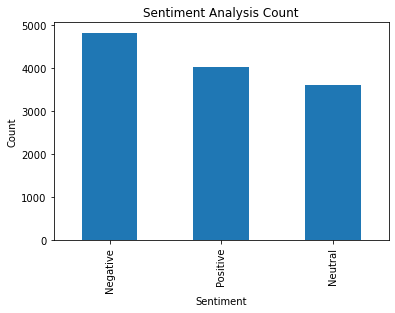

Negative    4818
Positive    4020
Neutral     3605
Name: Analysis, dtype: int64
time: 430 ms


In [28]:
#analysis count
df['Analysis'].value_counts()

#plot and visualize
plt.title('Sentiment Analysis Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

print(df['Analysis'].value_counts())


### 4.2 Polarity and Subjectivity Scatter Plot

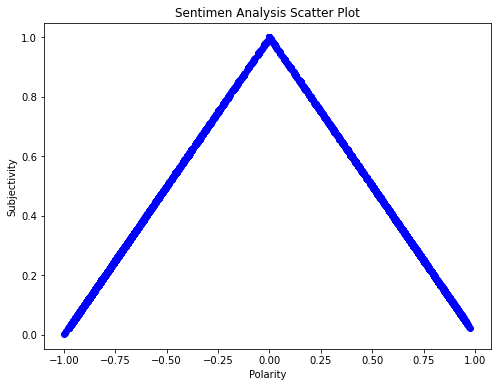

time: 17min 13s


In [29]:
#polarity and subjectivity


plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentimen Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### 4.3 Percentages of tweets

In [30]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet Text']

print('Total Positive Tweets Percentage: ',round((ptweets.shape[0] / df.shape[0])*100,1),'%')

# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweet Text']

print('Total Negative Tweets Percentage: ',round((ptweets.shape[0] / df.shape[0])*100,1),'%')

# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweet Text']

print('Total Neutral Tweets Percentage: ',round((ptweets.shape[0] / df.shape[0])*100,1),'%')

Total Positive Tweets Percentage:  32.3 %
Total Negative Tweets Percentage:  38.7 %
Total Neutral Tweets Percentage:  29.0 %
time: 34 ms


### 4.4 Piechart visualization

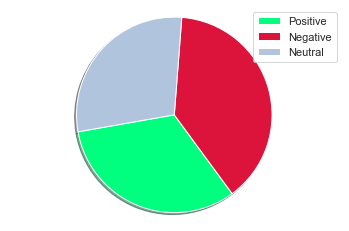

time: 559 ms


In [43]:
#piechart

labels = ['Positive', 'Negative', 'Neutral']
sizes = [32.3, 38.7, 29.0]
colors = ['springgreen', 'crimson', 'lightsteelblue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=190)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()


### 4.5 Composition Visualization

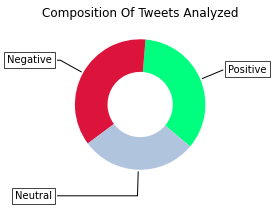

time: 624 ms


In [32]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

tweettype = ["Positive",
          "Negative",
          "Neutral"]

data = [32.3, 38.7, 29.0]
colors = ['springgreen', 'crimson', 'lightsteelblue']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(tweettype[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Composition Of Tweets Analyzed")

plt.show()

### 4.6 Density Plot

Text(0, 0.5, 'Density')

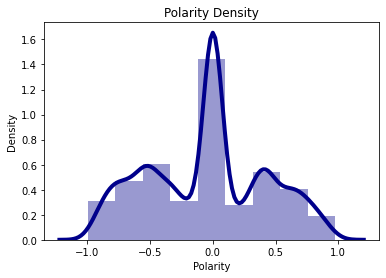

time: 403 ms


In [33]:
#density plot



ax = sns.distplot(df['Polarity'],
             norm_hist=True, kde=True,bins=int(45/5),
             color = 'darkblue',kde_kws={'linewidth':4})

ax.set_title("Polarity Density")
ax.set_ylabel('Density')

### 4.7 Boxplot

count    12443.000000
mean        -0.047177
std          0.468954
min         -0.997500
25%         -0.440400
50%          0.000000
75%          0.318200
max          0.977500
Name: Polarity, dtype: float64

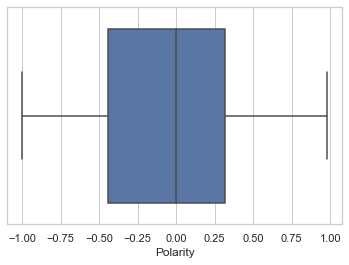

time: 338 ms


In [34]:
sns.set(style="whitegrid")
pola = df['Polarity']
ax = sns.boxplot(x=pola)

desc = df['Polarity'].describe()
desc

<h1>5. Words and Stories Visualization</h1>

### 5.1 Top Words Use In All Tweets

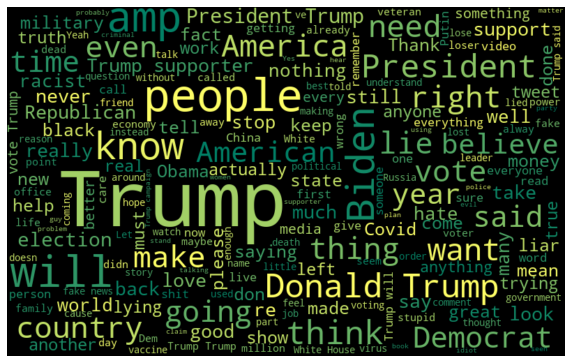

time: 5.96 s


In [35]:
#allwords

all_words = ' '.join([text for text in df['Tweet Text']])
            
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="black", stopwords=None, colormap="summer").generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 5.2 Top Words Used In Positive Tweets

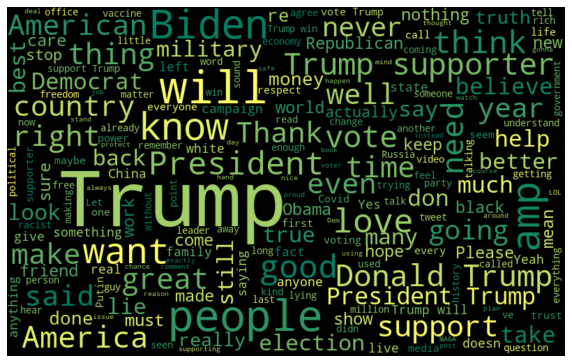

time: 3.82 s


In [36]:
#postive tweets

posi_words = ' '.join([text for text in df['Tweet Text'][df['Analysis'] == 'Positive']])
            
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="black", stopwords=None, colormap="summer").generate(posi_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 5.3 Top Words Used In Neutral Tweets

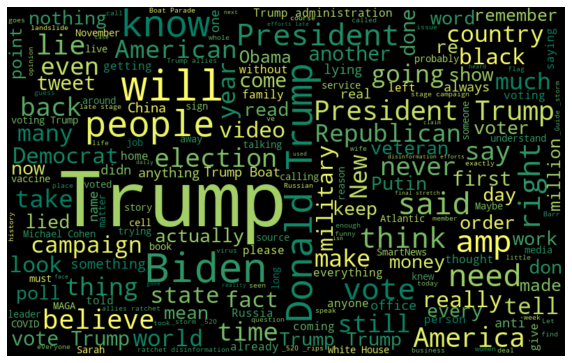

time: 3.16 s


In [37]:
#neutral tweets

neut_words = ' '.join([text for text in df['Tweet Text'][df['Analysis'] == 'Neutral']])
            
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="black", stopwords=None, colormap="summer").generate(neut_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 5.4 Top Words Used In Negative Tweets

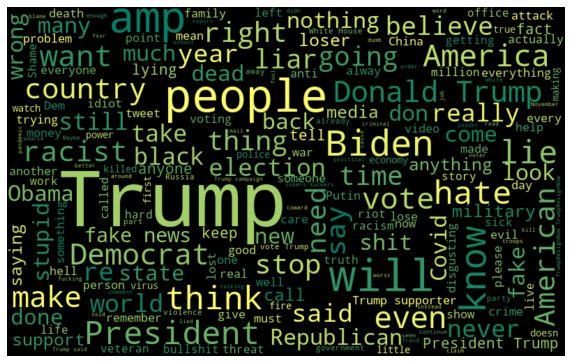

time: 5.03 s


In [38]:
#negative tweets

nega_words = ' '.join([text for text in df['Tweet Text'][df['Analysis'] == 'Negative']])
            
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="black", stopwords=None, colormap="summer").generate(nega_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 5.5 Frequency Plot For Top 10 Hashtag Used

In [46]:
#function to extract hashtag
def hashtag_ext(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags
                        
HT_positive = hashtag_ext(df['Tweet Text'][df['Analysis'] == 'Positive'])
HT_negative = hashtag_ext(df['Tweet Text'][df['Analysis'] == 'Negative'])
                        
#unesting list
HT_positive = sum(HT_positive, [])
HT_negative = sum(HT_negative, [])



time: 183 ms


### 5.5.1 Top 10 Positive Hashtags

In [ ]:
#plot

#frequency plot for top 10 positive hashtags
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d= d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data=d, x='Hashtag',y='Count')
plt.show()

### 5.5.2 Top 10 Negative Hashtags

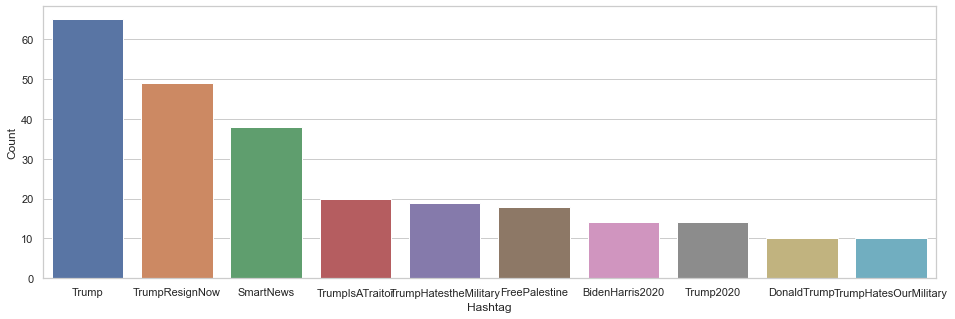

time: 650 ms


In [40]:
# making frequency distribution top 10 negative hashtags

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

<h1>6.0 Tweets Printing</h1>

In [41]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDF['Tweet Text'][i])
        print()
        j = j+1

1)_Kitchen_slc quick google search would help

2)Still waiting that universal heath care?

3)it’s trump supporter not, shes saying this pregnant woman unborn child

4)_owo Lmao you're such

5)Yet, another leftist doesn't understand meaning words she's talking about. Aren't tired embarrassing yourselves? Nationalism doesn't mean racism, genius. Putting America isn't racism. believe only whites American? "you" racist?

6)Coronavirus stimulus: Funding extra unemployment benefits ordered President Trump running _tsekova

7)rest world America looks like theocracy, baby “dick”tator making it’s “leader” 🤦🏽‍♀️🤷🏽‍♀️ *deep sigh*

8)track leaking interview hear have true!

9)free leaked onlyfans only fans sommer Lele pons Amanda cerny Francesca Charli d'ameilo dixie d'amelio lilhuddy Logan paul Harry styles Shawn mendes laverne Kardashian rock Jake paul Doja Nicki minaj James Charles Trump Biden

10)Would prefer book titled Fascist Lover" instead?😜 Melania Trump could write that, although sure lo


494)Dear Eric Trump- Your well. dementia. need right thing take spotlight. Find right facility him. Stop dragging around like monkey string loot treasury!#ElderAbuse

495)Exclusive: Nearly U.S. Veterans Issue Open Letter Support Trump

496)person schooling schooling! Virtual Learning acceptable Special Needs children! SPECIAL NEEDS LIVES MATTER

497)glad your going with Marxist playbook that they used against MLK. Some things never old. #BlackLivesMatter

498)@_ReaalAmerican_ yes... then should donate re-election campaign. Trump needs more money legal fees drug dealer donate “build wall” campaign (Mexico STILL hasn’t written that check?!) Bannon needs boat!

499)I’ll 1000th time. When Trump told ‘CA’ producers 2010 that Holly Robinson Peete clear winner said “They want pick n*gger” chose Brett Michaels instead could barely show

500)Reverend reveals what evangelicals privately about #Trump this what happens when your FAITH they bought sold with promise Heavenly Father message received

626)loved much, thought hire cabinet. After show unabashed support well known #DemocratOperative #FakeNewsCNN lier, make sick Your judgement horrible, protecting #LambTheSham

627)friend spent childhood girl. He’s better than trump supporter.

628)This true lmao💀 arguing with trump supporter literally asked getting billionaires making guap.

629)“President committed making sure that hold #China accountable this virus destroying hundreds thousands lives across world &amp; billions dollars wealth. will hold #ChineseCommunistParty accountable that,” Pompeo said.

630)While think trump ignorant governmental procedures powers times, that’s much better than having someone knows procedures power limitations constantly breaks them willfully.

631)Like many others have serious reservations Assange given seeming links with Putin's Russia, even bigger reservations about extraditing under Trump trial charges conduct that have been criminal when agrees.

632)President #DonaldTrump committed making 


935)support trump dont support BLM?

936)Take legal action them already

937)#trump2020 dear friends from west vote Trump real leader

938)Doni forget your daddy supported decision?

939)Donald Trump Overwhelming Love

940)Oregon discriminating against republicans, barred from adding voter statement they were only ones have this happen, other groups were added. Excuse missed deadline. Facebook removed Patriot Prayer group which supports rights Trump

941)_Maxwell_ Share cell with Donald Trump gulag.

942)Thank Ronna. know have been unable drain swamp over past years. have instead focused turning into beautiful cespool filled with ways self entichment. more swamp. Another promise kept.

943)will take anything Trump recommends anything

944)wants fit? Dejoy Community Walk Sunday. 09/13/2020. Location: Dejoy Castle Sidewalks miles. Dejoy’s USPS Corruption enabled Trump further muddy voting process. Bring your best walking shoes signs. miles

945)Trump's entire strategy seems losing base,

1067)When does your prison sentence start next year? Well haven't gotten that yet! HOLD YOUR BREATH PLEASE!

1068)have allowed yourself deceived. evidence, looked objectively, says Trump being controlled Putin. highly likely those refuse acknowledge truth also being influenced Russians. you?

1069)Sarah Huckabee Sanders insult truth &amp; honesty. lied living. paid salary. owes every single American apology. well refund. #FakeChristian #alternativefacts #GoBakeAPie #TraitorTrump #TrumpIsALoser #AmericaOrTrump

1070)_speaks That conversation with lit. forget very brilliant

1071)OMG!!!! can't ever shut up...can you😤😤😤 Oh...forgot it's inherited😤😤😤 Your whole family friends have just declared American Citizens...Mr. babble-mouth🖓🖓😤😤😤

1072)Thank you.

1073)Priceless LYING CONMAN!! with evangelical leaders turned Cohen said: 'Can believe that bulls***?'

1074)Trump wants News fire Jennifer Griffin because reported truth that spoke negatively about service men. Trump supporters people what

1354)will because will President then. will what fucked. will continue great things started with Obama, which have taken credit for.

1355)Putin will order Trump pardon states

1356)This garner support. condemning this directly affect your voting numbers. really want four more years Trump? Because this you're going

1357)LIE. IVANKA FAVORITE YOUR ONLY TRUTH!

1358)refused speak press didn’t publicise where was. Trump’s campaign publicised. Biden using votes exactly? It’s almost like used Biden votes

1359)that’s same textbook power point slides. Also, allowed should also allow classes that teach whiteness &amp; assimilation good, right? don’t learn BOTH sides, it’s indoctrination. critique taught!

1360)While you're telling people follow trump practicing medicine without license telling people what treat deadly disease, might well tell them vote twice like told supporters well...that they don't from hydroxychloroquine.

1361)Protected from their government badd people looking them allo


1422)Hongkongers need President Trump Eliminate PLEASE HELP HELP world

1423)Trump Kushners call them friends 🇮🇱🇮🇱😡😡

1424)Isn't know, diplomacy 101, especially with narcissistic president like Trump?

1425)Trump told “take team”. what call great respect her, woman. grift only survives with that orange clown.

1426)news Ukraine investigation. Agreement finalized child support case. But, sure, let’s bring just show limited your “intel” from Trump

1427)Lindsay really your back hasn't don't like using Trump either, think understand part motivation. "Republicans wear sneakers too".

1428)Just like tRUMP, this statement said bunch without saying anything all.

1429)please help brave girl that's afraid face they creating pressure sending state agencies house

1430)_LoRider Hmmm. sounds awful like REAL quid quo.... where hear months that before.... Love Left tries take credit every great thing Trump done, hang their dirty laundry Masters projection! Fake Media parrot

1431)Sounds like you’r


1755)thought people wanted return slavery blacks women were very keen government having they leave their inheritance don't want that taxed either, isn't spitting face more than just women with such revolting comment?

1756)Won’t surprised this Trump’s campaign stunts where “brought American jailed Philippines” home. Donald Trump loves dealing with dictators. Duterte sees Trump enabler. stupid scratching each other’s backs. #JusticeForJenniferLaude

1757)These protesters. Those rioters, white supporters drumpf cause chaos photo

1758)companies were friends trump.

1759)LOL! Seems that RETWEET some kind forwarded wonderful post wonderful people, responded. Well, least good taste! 😅😉🤦‍♂️

1760)It's interesting cycle. believe there's kind righteous simplicity amongst swing voters. They might follow politics narratives closely, they look around make judgement about things going. Trump swimming upstream, obviously.

1761)_Sowellfan Trump would never able give speech like this lifetime. That

2201)This article other relating news only display King Salman’s solo, mention Trump’s reaction. Interesting

2202)Just bunch liberals trying Trump dudes that anonymous sources legit because they aren’t anonymous writer publisher, them. would they think Trump guys would believe reporter major newspaper lmao

2203)_Estrada _T_Brown _saisjo _rulz _coyle _Esq29 This proves shallow Trump is...He cares NOTHING women, empathy, respect class them, people served American military REAL...😡😡😡

2204)Interesting. "remedy" nearly enough. complete review Sorrento Therapeutics very telling story about progressive seemingly obstructed effort FDA.

2205)America HAPPY though salute her! actions sign true patriot.

2206)Noor Ladin claims that would better protected from second 9/11 under Trump.

2207)Republicans follow Trump their best. It’s federal crime, they charged

2208)Thousands Trump supporters hold more ‘Great American Boat Parade’ events over Labor Weekend

2209)Former Secretary Defense Chuck Ha

2644)What? #BoycottHobbyLobby AGAIN? SUPPORTING PRESIDENT Hahaha! going HUGE shopping spree!!

2645)Nice try, Jabba. back your cave.

2646)True

2647)Even oppose Donald #Trump, could Democrats played this game? #COVID19 #HCQWORKS #Usa2020 _soir.

2648)TYVM book bring this great account warriors Duty, Honor, Country. very unfortunate that sick sitting person, attempting man, elected lead loser/sucker

2649)sheriff said photographers boat sunk other boats?? Lmaooo please. wake from trump boats sunk other boats

2650)Trump's dictionary. Economy- bank aaccount". Make America great again- "Make rich again". cuts benefit businesses first foremost" doing great covid testing -"I've tests everyday oval office" Everything about himself.

2651)ONLY thing Trump cares lining pockets. That's That's ONLY concern. LINING POCKETS. #voteblue

2652)fact, going vote eaerly because know that Trump Russian cohorts DESPERATE &amp; DANGEROUS &amp; they're going hack this election also. &amp; hugs you, Miss As

3062)Trumpeters their best!

3063)Atlantic Trump. Trump wins.

3064)correct, that those numbers not.

3065)News business model polarisation: "Operators subscription business [...] have found success telling what want hear, signaling that they are, some sense, your team. are, after all, selling something."

3066)LOL, thought Drunk!?!?

3067)That when someone handed script reads without knowing caring about facts. Sully's just trying stay hip, cool, relevant guess. President Trump stood military veteran's better than President ever know back!

3068)Nice Junior like fact check something that don’t

3069)Klux Klan Thanks Your Support President Trump...Klan once again endorsed President Trump policies actions since they will help Klan achieve goals

3070)Military family near base retired military neighborhood support Trump 100%

3071)They weren't peaceful protests. wasn't tear gas. Scientists testified that Trump followed their recommendations Fauci said Trump's early actions saved hundreds

3420)Trump versus Biden: honest arrogance fake humility?

3421)_defender genuine question, trolling, support Trump? Like just dont understand guys dont even want different Republican?

3422)Trump Parody Video Firing Obama Bumped Never Aired 2012 Here It's Awesome!

3423)Notice Trump supporters happy showing support (light), &amp; supporters night angry destructive (darkness)

3424)good journalist... article well sourced. Many other credible media outlets have confirmed... Even confirmed. Trump credibility.....We have heard disparage McCain years. good with your reputation going down w/trump?

3425)Translation: “Time throw B.S. Americans matter risible ludicrous distract them from Trump’s calling American heroes losers encouraging followers commit felonies voting twice.”

3426)Trump inherited strong booming economy right work looting himself rich family friends.

3427)it’s blessing apart more waiting forever physician have needs met. Thank President Trump

3428)Here Comes Trump rescue n

4001)Sort like Trump Pence signs

4002)good thing about this article...we have been reminded videos,articles,tweets,etc vets family members Trump comforted many when they needed most.

4003)#TrumpIsARacist Thank Laurene👍👍

4004)3/Afterward, Trump, whose backbone basically noodle, pretty shaken. would Trump take responsibility? It’s clear didn’t exactly have sterling life with parents, he’s been pampered life.

4005)Says chief liar herself. Yeah believe your integrity!

4006)liar care about soldiers have cold heart just like trump

4007)King Salman told President Trump appreciated efforts support peace reiterated that #SaudiArabia wants fair permanent solution Palestinian issue based 2002 Arab peace initiative.

4008)look angry because you're washed Seems theme entertainer's that support Trump, block

4009)Let’s hope right better still, that Trump gets booted November. hope Republicans select more palatable candidate next time can’t worse, surely)

4010)think ANYTHING Trump Republicans 

In [42]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['Tweet Text'][i])
        print()
        j = j+1

1)Trump been pocketing some they have been paying Trump children’s significant others with campaign cash.

2)This what loser looks like

3)have this arse about face, Romney, first time. Trump maliciously mendaciously hinting that vaccine will available before election stoke deplorables. Fauci sceptical. Biden Harris call this right necessary.

4)Police Won't Name Leftist Attempted Kill Trump Supporter Saturday, Girlfriend Says 'This Absolutely Targeted Attack'

5)This talked about earlier year knew Trump Card. DemoRats emotionally uncontrolled illogical creatures. crazy, have excuse. They just plane dumb have excuse.

6)FAKE NEWS AGAINST PRESIDENT SHAMEFUL

7)look ..... THIS seems relevant.... trump mocks visiting sons gravesite ...... #TrumpIsACompleteFailure #trumpisafuckup #trumpissickinthehead

8)America just group 18-25 year olds running rampantly around town waiving flags lighting each other fire. have innocent people these citites voting Trump.

9)Trump wanted affirmative action


395)this trump supporter trying told idiot hacktivist that friends doxxed sent excel spreadsheet boss racist comments she’s made internet that idiot believed

396)Update: wife Trump's senior legal advisor holy shit

397)American, rather have Biden since feel like even though he's probably going much, don't think he's going make things much worse, unlike Trump

398)_resistor Jesus would come first. wouldn't allow this ever Christs America.

399)here's another loser, NOT!

400)have your nerve, Queen liar!

401)Sickening

402)Sounds like this just attempt back into spotlight, which were somewhere time? wonder what trumpets gonna with their time when trump Trumpism defeated months?

403)argument that should 'obey law' flawed that those power change easily couple days). Many media supporting plans make protesting illegal, condemning Hong Kong suppressing speaking slippery slopes Putin/Trump

404)stories real. It’s your presidency that fake. emperor slowly being seen what is...a naked, narc

462)Does meatball Jung Hung still have your number? 8675309 shit, that's Jenny's number. 6661313

463)only Biden could lose debate against Trump passed drunk. think it's hysterical that Trump's idiot team tried paint having problems. always going beat Trump will bigger deal.

464)just hope this tweet gets President Trump. this point, skeptical about President Trump's victory come 3rd. What however afraid aftermath reelection which know going brutal. will they kill that's

465)that Donald Trump aggressively touches wife's butt, it's that Betsy rudely wounds teenage girl's diaries during Tuesdays.

466)What disinformation? Like your calling John McCain loser tried deny

467)Nothing else country like man? pandemic fight??

468)When Phony story arises, it's critical moments never allowed distraction that might disrupt essential schedule because world looks productive reign continue. After all, generation come will maintain this footprint guide.

469)Biden could still lose suburbs Trump

47


962)called them LOSERS

963)this stop mocking people pathological condition?? #realdonaldtrump

964)White House Asked Secretary About Running Pentagon Trump Fires Esper

965)want your american children deep state America grow totally retarded then ENCOURAGE IMMIGRATION NOW!

966)wasn't aware that, thanks, I'll look into

967)Maybe, carry unchecked, face global catastrophe. Whilst have utter morons like Trump promoting coal, need noisy opposition. Greta more converts than Trump.

968)President, these YOUR tactics. Lies, Fear, term invented because your lies Fake News.

969)Trump stopped years ago. that's something want talk about.

970)have same problem with family. fact: Suddenly, wearing mask "patriotic".

971)wrong with you?

972)_resistor Obama sent troops into after after war. useless.

973)America stupid BOLTON rest when said what said national comments times anybody wanted take Trump down Bolton enough hate anger behind told truth VERY RARE WASHINGTON

974)Saudi King, Donald Tru

1060)morrison doing trump risking Victorian's lives &amp; there's another wave will blame? Certainly himself he'll take Labor Premier Andrews He's baiter this PM......😖

1061)Trump Trying Lose Syria Bulwark

1062)years even know that those lies tricks

1063)Trump boat parade sails into Erie, ashore protesters

1064)There only problem with that Fauci report: quoted Trump. same time going crazy saying 3.4% think world will believe, Trump WHO? From then just political, team apocalypse mission.

1065)_locke _nerd_skull Trump incompetent that starting lose white supremacist voting block Status Joe.

1066)#SaveTrumpByVotingHimOut isn't very good appreciating what &amp; left him: economy, “Playbook Early Response High-Consequence Emerging Infectious Disease Threats Biological Incidents," etc. #VoteOutTrump

1067)Says TRUMP sure!! DON'T forget when recently TRIED convince everyone that TRUE death toll America from virus that time) ONLY 9,000 headlines stating: '180,000 Americans dead from Covi

1393)Aren’t y’all tired this disgusting family? Seriously shut already.

1394)Dems destroying America won’t denounce communist party

1395)Again copy Trump tell what Trump takedown showing riots looting during Trumps presidency blaming Biden

1396)Thinking back aunt getting fight with during whole Imus debacle saying that racist piece shit deserved fired regularly shares racist shit time proudly flies trump flag front porch

1397)Trump lock down Coronavirus. destroy economy. Americans face eviction crisis, followed foreclosure crisis. Bankers received $4.5 trillion dollars printed since 2008 will those houses. Mass transfer wealth.

1398)Congratulations your decision. It’s time china's disrespect.

1399)don't really follow politics that much Cstance tipped towards Trump madness other areas.

1400)CREATED THIS SITUATION, MORON

1401)"The moves members #SecurityCouncil rejecting action extreme importance that indicates utter political isolation #Trump administration world scene," said Ko

1512)_foss Yep, y’all probably right they masquerade enforcement hide behind their racist costumes. Trump followers want this next trumpnazi land

1513)Moon Jae-in fraudulent election order hide restrained people oppose him.

1514)Another racist Trump supporter.. knew?

1515)trump evil like

1516)already told death certs work. recommend they want, they don't determine what certifier puts death cert. That's doctor.

1517)Fake news alive well Even after being sued, contributors still push false narratives defamation against President Trump. political analyst Lockhart started floating theory Twitter that Trump potentially stroke.

1518)Atlantic's Goldberg: Trump's tweet threat, more reporting come Trump disparaging military

1519)Disease, flu, stroke, heart attack, etc...covid just sped U.S.A told beginning January, Late January Trump closed borders China, then threw saying racist xenophobic Trump that. Your precious year failure Dems like

1520)totally believe trump called fallen Soldier

1905)Your lies false stories needed stop years here are.#BidenHarris2020

1906)Don’t forget contribute Trump’s presidential campaign! He’s going have lots more legal bills &amp; uses hard earned money them! just keep giving &amp; keeps taking. Suckers #VoteRed2020 #VoteRedToSaveAmerica2020 #Trump2020Landslide #Trump2020

1907)#BlackLivesMatter many heads will have beaten trying deflect "REAL NEWS"? proved your disdain military along with your cowardice dodging draft. dodger should ever Commander-In-Chief. Here's REAL footage; THEY served Europe/WWII

1908)cheats

1909)Cohen Trump's fixer. went prison because Trump.

1910)Leaked Details From Michael Cohen's Shocking Trump Memoir

1911)Desperate chief fake news mongerer. Including this one.

1912)really really wanted cause those guys firing cannons.

1913)fool Steven.

1914)2020 election: Trump uses final stages campaign cast himself defender white America Disgusting clearly racist. POTUS responsibility represent citizens country.

1915)

2054)this point trump desperate he’s showing ass. terrorist family endorsing campaign? yall affiliated

2055)Suckerbee wants forget paid your dollars Trump. #Cancel #Karens

2056)Absurd! Who’s this idiot reporter? should after Trump stooges, they ones looking that minute fame

2057)What neither side truly violent? What someone planting these riots cause civil social unrest?

2058)Mrs. Sanders, have been lying much lost your credibility long ago. forget trump never showed respect. really. contrary. Don't insult people thinking they haven't clue.

2059)Republicans Worry That Trump Campaign Broke

2060)this true LOSER

2061)sick trump’s America yet? change with vote Biden November

2062)_Estrada _T_Brown _saisjo _rulz _coyle _Esq29 Simple. Like Trump. Limbaugh selfish, gutless coward...

2063)vote trump wrong!!

2064)Trump going convicted crimes would have been already. Trump gets away with everything. This refuses show taxes.

2065)trump coward, I’ve your back fellow servicemen. VoteWith

2337)Trump's attempts deny attacks veterans with News #SmartNews

2338)Obviously don't like fact that #Trump WILL Potus Again. .....

2339)cant tell people think that trump greastest thing rule country whats smart thing mask helping reduce many people because people think they just have cold really covid breath could kill somebody

2340)Trump must forced resign massive protest around world. #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow #TrumpResignNow

2341)Talk about hypocrisy, were biggest liar trumps administration besides Trump himself!

2342)Raise campaign funds with fight between Ivanka Melania. Ratings.

2343)_Sowellfan Trump trying repaint overwhelmingly peaceful protest movement violent based actors. These people were burning buildings, neither were hundreds thousands people marching across country:

2344)talking about losers suckers??

2345)thing C

2630)Yeah definitely think people think both Biden Trump awful selection.. don’t think that’s they rioting

2631)Hating your fellow Americans isn’t patriotic. FYI. #Rude #UnAmerican #YouAreBeingUsed

2632)Ever notice bullies never harrass anyone they think might strike back?

2633)Bahaha irony.

2634)seriously listen mouthpieces Democrat left. wing media every time they drag "anonymous sources" bash have done outright lied years.

2635)Like this, after Trump attacks whistleblowers, makes every whistleblower defendant:

2636)More Than Ever, Trump Casts Himself Defender White America America's real problem reporters like Peter Baker editorializing rubbish depicting Trump defender white America!

2637)I’ve dropped more attractive shits than this

2638)They want kill Christians Biafrans. #SuportBiafraExitFromNigeriaNow #weNeedBiafra #saveBiafrans

2639)Trump unfit. He’s unfit hold office, “responsible” anything role. He’s just waste space oxygen. negative force universe. drain everyone els

2858)Liars lie...Trump allies ratchet disinformation efforts late stage campaign

2859)With additional "virus" benefits, should. You're working, transp. costs; dry-cleaning; lunches for. most those complaining don't have jobs first place!

2860)selection process that ends here isn’t purpose. selection process that ends here failed, needs reform.

2861)Something Could that #Trump buying votes? Accidentally payed 1200 Austrian pensioner too. 😂😂😂🤡😉 Something research, just before election money paid out. (Hope deepl translator works good austrian press-article)

2862)Writing about alleged tryst with future president, Stormy Daniels says “may have been least impressive sex” she’d ever had. blow manhood, describes genitals lurid detail, saying penis “smaller than average,” “not freakishly small.

2863)guess those Trump supporters SUCKERS.

2864)proud supporter Israeli occupation racist decisions? Shame you, support those commit crimes, violations, murder displacement against Palestinian peo

3066)trump does mocking people, never does anything positive.

3067)Possibly, both parties aren’t that different aside from their hatred fear each other. will watching trump lose would satisfying just watching Hillary

3068)Translation: Trump hates everything everyone hates himself. Hint: What other national leader, HISTORY WORLD, hates country call nation's soldiers "losers" "suckers"? Answer: NONE. ONE. REPULSIVE.

3069)Despite potential coronavirus ravage prison populations, President Donald Trump said disagreed with allowing prisoners free said he’d look into options prevent state local authorities from making those decisions.

3070)Trump comes from long line cowards

3071)debunked fact it’s been confirmed attitude military poor. doesn’t never will. Trump lie.

3072)foul play- just combination stupidity selfishness

3073)State fact talk your ass.... Show Trump University many left disgruntled debt because

3074)"Trump came Dover after wife killed fighting ISIS. absolutely respects 

3339)_Kremzer _man_chu speaking deflection mentioned trump when Biden groping little girls boys. Watch this video nice slow watch sick this girl are. Biden literally grooming right here. it’s reoccurring issue, never stopped. okay with

3340)#love Goodness.... Real will prolly never even smoke. Help all.

3341)no..yeah it’s legit. agree CI’ve seen scholarly papers (how racism shaped laws &amp; jurisprudence). However, some “crt nutshell” crap I’ve seen post crap...but think that’s they want sound extreme &amp; it’s really accurate.

3342)_mituzas _RK_go _currin @__hyxl__ your asses &amp; it’s time take chunks your asses RESTITUTION &amp; REPARATIONS.... where those payments??? yeah forgot didn’t that

3343)Trumpers disgusting scum.

3344)This middle Disgrace President such LOSER absolute SUCKER.

3345)Scoop: Kevin McCarthy warns Trump's mail could screw

3346)Barack Obama's brutal two-minute takedown Trump's presidency must watch

3347)Yawn.. and? That's have? reported Hillary election


3491)Because damn sure ain't Trump.

3492)It’s hilarious watch these enablers fight indefensible defend hypocritically. They must group email from trump late night something.

3493)You're proven liar.

3494)Very powerful documentary. MUST WATCH! Biden 100% wrong about China today. adds question that must taken seriously. What Biden what innocently think? speaks itself. _PMO

3495)houses will their damn nightmare Keep pushing shoved back

3496)proud supporter Israeli occupation racist decisions? Shame you, support those commit crimes, violations, murder displacement against Palestinian people! #FreePalestine 🇵🇸🇵🇸🇵🇸

3497)"Let's Make America Great Again!" Minutes Later America Fire There's Virus spreading that Trump ignored month People protesting Boogaloos rioting economy gutted THIS BIDEN'S FAULT!" It's funny since Trump supporters blamed

3498)What needed Gatling gun.

3499)anyone that votes bound loose there into economic depression just like economy will

3500)don't want anything a

3723)Trump maintains their guilt this day. Their confession forced.

3724)Secretary Defends Trump's Insults POWs: Just 'Politics' 'Heat Campaign' Daily Beast

3725)Trump more than 180,000 watch while golfed. Trump allowed Putin bounty servicemen. Trump called dead servicemen suckers &amp; losers. Trump unfit even catcher. Trump #WorstPresidentInHistory.

3726)Travis, you’re such country music star. miss your tweets calling military heroes losers suckers? FYI, what will make resisters relevant their vote November.

3727)What horrible fker are, seems like shit attracted shit. You're exact opposite perceive religious person should

3728)happy that Covid-19 difficult outsmart Trump that spot.. Hail India.. #MODIfied_Pandemic _PYC

3729)U.S. Could Thrown Olympics Over Trump Funding Threats, World Anti-Doping Agency Warns

3730)Leaker Sabotaged Raids Strikes Again With Memos Declaring White Supremacists "Greatest Terror Threat" Zero Hedge please address this. Please sir.

3731)Donald Trump's

3978)'WE'RE SCREWED': Kevin McCarthy Gives Trump Some Tough Election Talk HOUSE MINORITY LEADER SAYS PRESIDENT'S ATTACKS VOTING MAIL COULD HUREPUBLICANS NOVEMBER.

3979)Obama few, reunited them with family shortly afterward. Trump implemented current policy automatically indefinitely separate cage children, resulting current humanitarian crisis with abused suffering babies, toddlers, children, parents.

3980)Trump really hurt your guises feelings

3981)someways been lucky that Trump fallen into military conflict. military cabal have tried.

3982)German official Sunday attacked Donald’s Trump’s “unscrupulous”and “disturbing” call Americans vote twice, calling effort undermine U.S. presidential election event Trump’s defeat. incredible number things United States”

3983)This ladies gentlemen what fascism about want this then vote don't want this then vote Trump rule vote vote Trump smart America Stay America netsim fascist regime that China

3984)Could Trump more dangerous &amp; offensiv

4240)Trump White House asked secretary Pentagon president fires DOD’s Esper

4241)must living novel. When will learn that Trump projection evil slime-being, seeking kill amusement?

4242)Trump Campaign Releases Brutal 'MEET BIDEN'S SUPPORTERS' (VIDEO)

4243)apparent WARNING continued:And everyone beware because they’re gonna stop.They’re gonna stop BEFORE election November they’re gonna stop AFTER election day.And that should everyone should take note that.”Trump can,will DEFEND America,4 more yrs!

4244)won't matter. Lies will told. Fact checkers will show their bias. Trump will appear bully. Nothing changes.

4245)Trump working furiously undermine mail-in voting. Rank-and-file Republicans swing states falling line help him.

4246)Maybe riots wouldn't happening there president that tried unify country hear what problems instead throwing fuel fire pitting group people against other. Trump only knows instigate, bring calm

4247)needs come': Warning signs Biden North Carolina race tighte

4393)“The silence these senior aides really different from silence virtually elected Republicans,” What shocking report about Trump military reveals about

4394)_m_jeannie _zekrom They bunch bullies just like Trump. They hurl insults alldamn foul when gets dished back. Trump been trashing Biden year soon says TRUE thing about Trump, followers start crying. Pathetic they Deserve Djt!

4395)#BIDEN liberal hypocrisy wasn't President Trump suggested that Democrats saying President Trump suggested that just take heat Nancy Pelosi' hair Biden's failed everything

4396)Disgusting you’d expect from them!

4397)It’s liar. You’re asking believe over Marine veteran journalist. Fuck

4398)_afc That's true this different. This isn't Political debate left/right disagreement. tearing country half. He's attack USA. MUST removed. Everything touches turns back. Nothing else matters this time

4399)liar. lied about call trump made grieving widow fallen soldier. Trump told Myeshia Johnson, that deceased h

4639)🤷🏻‍♀️I don’t know,..but should believe polls after 2016?.. staying nervous shit that tRump gets another term. 🙇🏻‍♀️

4640)instead addressing clip which shows there something SERIOUSLY wrong with Trump, deflect Biden? about address lost Trump

4641)that backwards bucko. it's tRump Crime Family you're describing. paying attention. sauce.

4642)trump=pro high Think about race It's genetic from what going &amp; forever trump choice. IQ=eternal violence, disease poverty. work brainstats worlddata. Look race race country. can't changed!

4643)_MagaUSA _Trumplican _paula _Liberal73 _always _Liberal _ANT1 _Trump7 secretary dismisses Trump remarks 'politics' denies President made disparaging comments about fallen Marines

4644)don't watch either show, must confused died SARS maybe you're thinking H1N1 where 12,000 people died within year. Educate yourself, look silly with these comments, stop embarrassing yourself

4645)peaodophile connection hard ignore. When Morrison went far, inviting A

# 7.0 Conclusion

> For the datasets crawled from the Twitter, VADER sentimenet analysis shows that total negative tweets is higher than total positive tweets. While neutral tweets are the lowest.

>Total Positive Tweets Percentage:  32.3 %

>Total Negative Tweets Percentage:  38.7 %

>Total Neutral Tweets Percentage:  29.0 %

> Trump has a higher negative tweets.